In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pointbiserialr

In [2]:
df = pd.read_csv('/content/ifood_df.csv')
df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 39 columns]

In [3]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

Поиск пропущенных значений.

В данных нет пропущенных значений, а во фрейме данных содержится 2205 наблюдений.

In [4]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  marital_Together  marital_Widow  education_2n Cycle  \
count   2205.000000  ...       2205.000000    2205.000000         2205.000000   
mean      44.057143  ...          0.257596       0.034467            0.089796   
std       51.736211  ...          0.437410       0.182467            0.285954   
min        0.000000  ...          0.000000       0.000000            0.000000   
25%        9.000000  ...          0.000000       0.000000            0.000000   
50%       25.000000  ...          0.000000       0.000000            0.000000   
75%       56.000000  ...          1.000000       0.000000            0.000000   
max      321.000000  ...          1.000000       1.000000            1.000000   

       education_Basic  education_Graduation  education_Master  education_PhD  \
count      2205.000000           2205.000000       2205.000000    2205.000000   
mean          0.024490              0.504762          0.165079       0.215873   
std           0.154599              0.500091          0.371336       0.411520   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              1.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

          MntTotal  MntRegularProds  AcceptedCmpOverall  
count  2205.000000      2205.000000          2205.00000  
mean    562.764626       518.707483             0.29932  
std     575.936911       553.847248             0.68044  
min       4.000000      -283.000000             0.00000  
25%      56.000000        42.000000             0.00000  
50%     343.000000       288.000000             0.00000  
75%     964.000000       884.000000             0.00000  
max    2491.000000      2458.000000             4.00000  

[8 rows x 39 columns]

In [5]:
df.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpOverall      0
dtype: int64

Все типы столбцов выглядят хорошо.

Нет необходимости изменять какие-либо типы данных.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         


Оценка уникальных значений Давайте проверим уникальные значения в каждом столбце. Если столбец имеет одинаковые значения, то мы не можем использовать этот столбец в нашем анализе и можем удалить его из фрейма данных.

In [ ]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Master           2
education_PhD              2
MntTotal                 897
MntRegularProds          974
AcceptedCmpOverall         5
dtype: int64

Столбцы
 Z_CostContact и
  Z_Revenue имеют одинаковые значения. Эти столбцы не помогут нам лучше понять наших клиентов.
  Мы можем удалить эти столбцы из фрейма данных.

In [7]:
#df.columns(['Z_CostContact','Z_Revenue'])
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True, errors='ignore')

Box plot

Графическое отображение общей суммы, потраченной на все продукты (MntTotal)
Наш анализ будет сосредоточен на общей сумме, потраченной на все продукты (MntTotal). Boxplot поможет нам выявить выбросы, если таковые имеются.

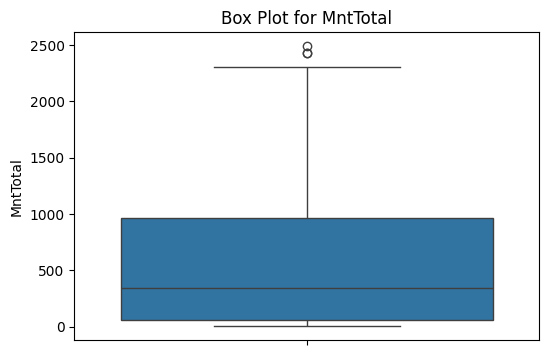

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

Вычислим квартили и межквартильный размах для столбца MntTotal. Определим границы для выбросов на основе межквартильного размаха. Выявим и выведим строки с выбросами в столбце MntTotal.

In [10]:
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1159  90638.0        0         0       29      1156        120   
1467  87679.0        0         0       62      1259        172   
1547  90638.0        0         0       29      1156        120   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1159              915               94               144            96  ...   
1467              815               97               148            33  ...   
1547              915               94               144            96  ...   

      marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
1159                 0              0                   0                0   
1467                 1              0                   0                0   
1547                 0              0                   0                0   

      education_Graduation  education_Master  education_PhD  MntTotal  \
1159                     0                 1              0      2429   
1467                     1                 0              0      2491   
1547                     0                 1              0      2429   

      MntRegularProds  AcceptedCmpOverall  
1159             2333                   1  
1467             2458                   3  
1547             2333                   1  

[3 rows x 37 columns]

In [11]:
#  Уберем выбросы
df = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
df

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2200              182               42               118           247  ...   
2201               30                0                 0             8  ...   
2202              217               32                12            24  ...   
2203              214               80                30            61  ...   
2204               61                2                 1            21  ...   

      marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
0                    0              0                   0                0   
1                    0              0                   0                0   
2                    1              0                   0                0   
3                    1              0                   0                0   
4                    0              0                   0                0   
...                ...            ...                 ...              ...   
2200                 0              0                   0                0   
2201                 1              0                   0                0   
2202                 0              0                   0                0   
2203                 1              0                   0                0   
2204                 0              0                   0                0   

      education_Graduation  education_Master  education_PhD  MntTotal  \
0                        1                 0              0      1529   
1                        1                 0              0        21   
2                        1                 0              0       734   
3                        1                 0              0        48   
4                        0                 0              1       407   
...                    ...               ...            ...       ...   
2200                     1                 0              0      1094   
2201                     0                 0              1       436   
2202                     1                 0              0      1217   
2203                     0                 1              0       782   
2204                     0                 0              1       151   

      MntRegularProds  AcceptedCmpOverall  
0                1441                   0  
1                  15                   0  
2                 692                   0  
3                  43                   0  
4                 392                   0  
...               ...                 ...  
2200              847                   0  
2201              428                   1  
2202             1193                   1  
2203       

In [12]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2202.000000  2202.000000  2202.000000  2202.000000  2202.000000   
mean    51570.283379     0.442779     0.507266    49.021344   304.960036   
std     20679.438848     0.537250     0.544429    28.944211   336.135586   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35182.500000     0.000000     0.000000    24.000000    24.000000   
50%     51258.500000     0.000000     0.000000    49.000000   176.500000   
75%     68146.500000     1.000000     1.000000    74.000000   505.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2202.000000      2202.000000      2202.000000       2202.000000   
mean     26.252044       164.336058        37.678474         26.967302   
std      39.589747       216.312982        54.821185         40.926101   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       230.750000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  marital_Together  marital_Widow  education_2n Cycle  \
count   2202.000000  ...       2202.000000    2202.000000         2202.000000   
mean      44.014986  ...          0.257493       0.034514            0.089918   
std       51.747221  ...          0.437353       0.182587            0.286130   
min        0.000000  ...          0.000000       0.000000            0.000000   
25%        9.000000  ...          0.000000       0.000000            0.000000   
50%       25.000000  ...          0.000000       0.000000            0.000000   
75%       56.000000  ...          1.000000       0.000000            0.000000   
max      321.000000  ...          1.000000       1.000000            1.000000   

       education_Basic  education_Graduation  education_Master  education_PhD  \
count      2202.000000           2202.000000       2202.000000    2202.000000   
mean          0.024523              0.504995          0.164396       0.216167   
std           0.154702              0.500089          0.370719       0.411723   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              1.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

          MntTotal  MntRegularProds  AcceptedCmpOverall  
count  2202.000000      2202.000000         2202.000000  
mean    560.193915       516.178928            0.297457  
std     572.096830       549.962471            0.678134  
min       4.000000      -283.000000            0.000000  
25%      56.000000        42.000000            0.000000  
50%     342.500000       288.000000            0.000000  
75%     962.000000       883.000000            0.000000  
max    2304.000000      2259.000000            4.000000  

[8 rows x 37 columns]

Уберем явный выброс с колонке

MntRegularProds


<Axes: >

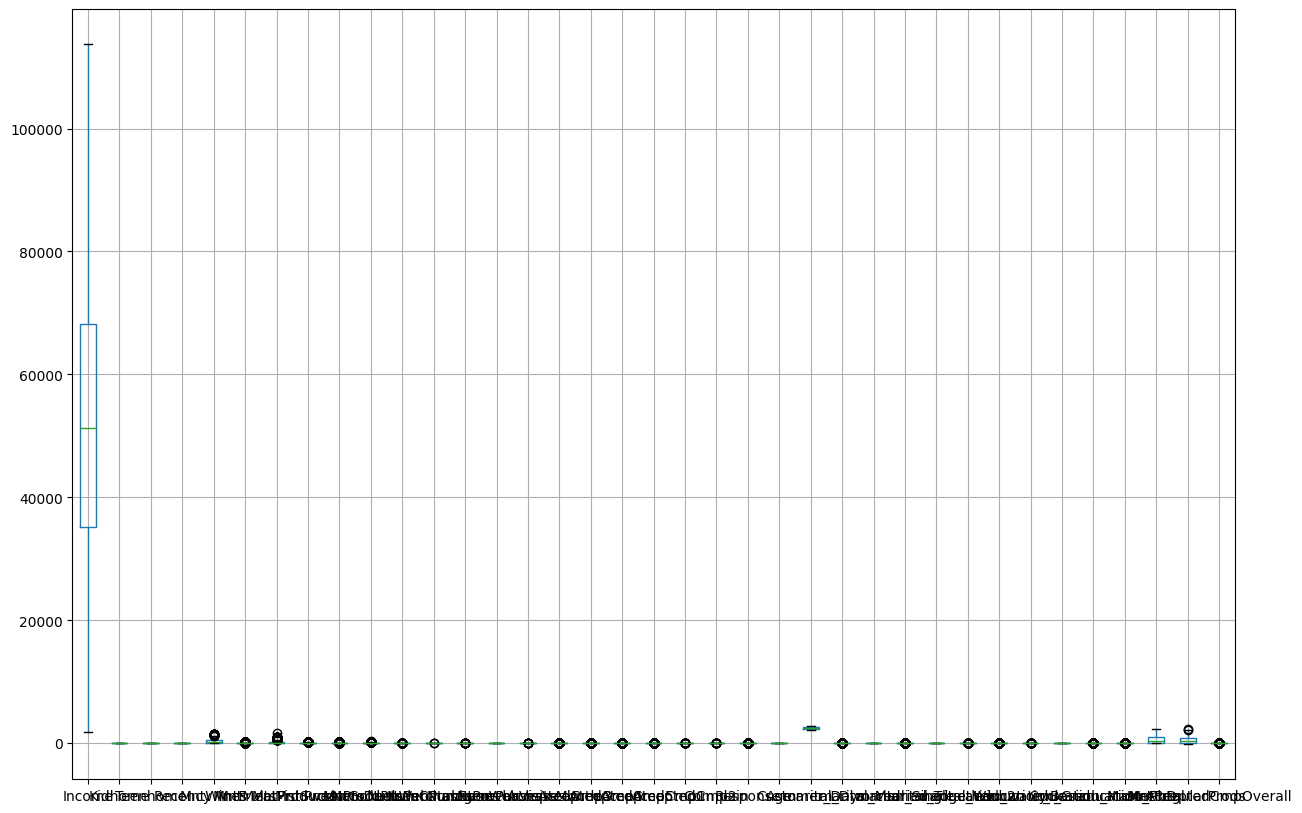

In [14]:
clean_df = df[df['MntRegularProds'] != -283.000000]
clean_df.boxplot(figsize=(15,10))

ДАЛЕЕ НАШ МАССИВ БУДЕТ clean_df

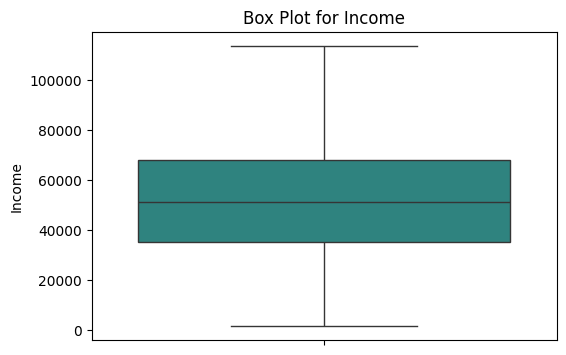

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=clean_df, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

Проверим наше удаление выбороса в колонке

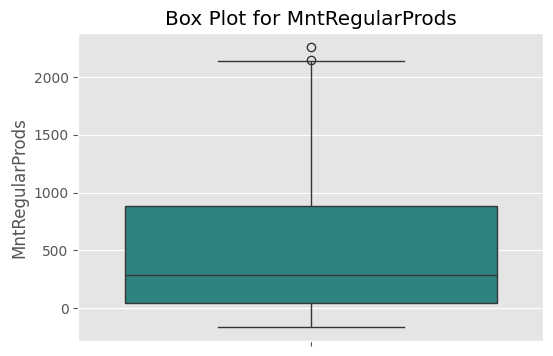

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=clean_df, y='MntRegularProds', palette='viridis')
plt.title('Box Plot for MntRegularProds')
plt.ylabel('MntRegularProds')
plt.show()

Распределение доходов близко к нормальному распределению без каких-либо отклонений.

По колонке
'Income'

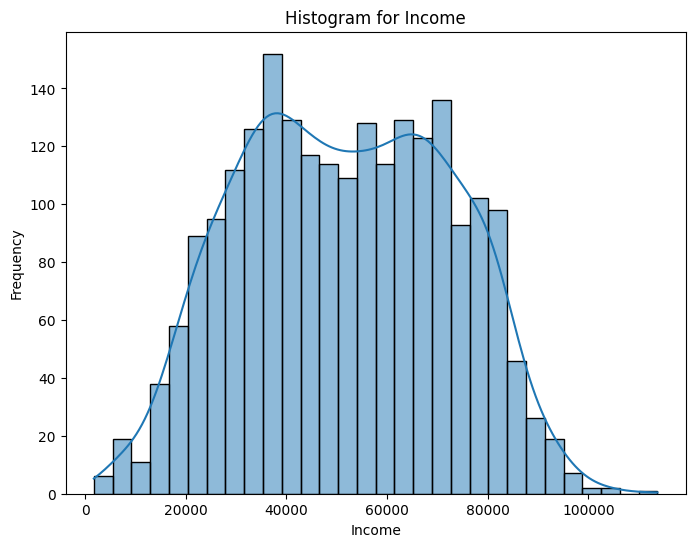

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=clean_df, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Посмортим на иссиметрию колонки возраст.

Асимметрия (Skewness)
Асимметрия — это мера симметрии распределения данных. Она показывает, насколько распределение смещено влево или вправо относительно среднего значения.

Положительная асимметрия (skewness > 0): Распределение смещено вправо, то есть хвост распределения тянется вправо.

Отрицательная асимметрия (skewness < 0): Распределение смещено влево, то есть хвост распределения тянется влево.

Нулевая асимметрия (skewness ≈ 0): Распределение симметрично относительно среднего значения.

Эксцесс (Kurtosis)
Эксцесс — это мера остроты пика распределения данных. Он показывает, насколько пик распределения выше или ниже, чем у нормального распределения.

Положительный эксцесс (kurtosis > 0): Распределение имеет более острый пик и более тяжелые хвосты по сравнению с нормальным распределением (leptokurtic).

Отрицательный эксцесс (kurtosis < 0): Распределение имеет более плоский пик и более легкие хвосты по сравнению с нормальным распределением (platykurtic).

Нулевой эксцесс (kurtosis ≈ 0): Распределение близко к нормальному распределению (mesokurtic).

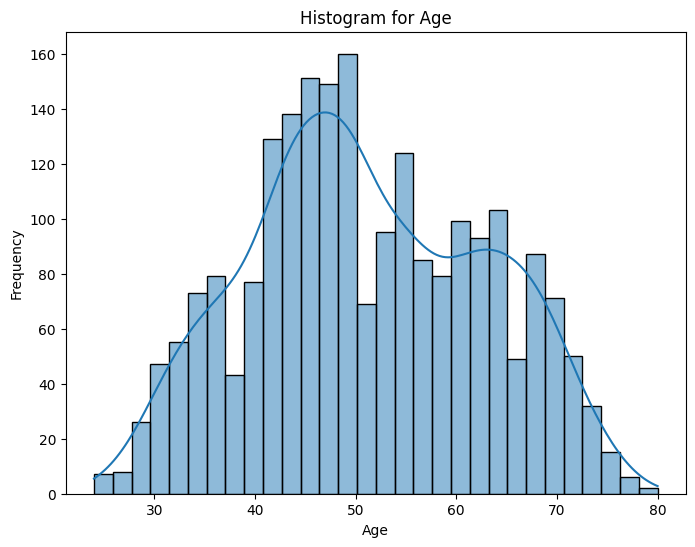

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=clean_df, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Асимметрия: Небольшая положительная асимметрия (0.091192) говорит о том, что распределение слегка смещено вправо, но это смещение незначительно.

Эксцесс: Отрицательный эксцесс (-0.797129) указывает на то, что распределение имеет более плоский пик и более легкие хвосты по сравнению с нормальным распределением.

В целом нас все устраивает.

In [ ]:
print("Skewness: %f" % clean_df['Age'].skew())
print("Kurtosis: %f" % clean_df['Age'].kurt())

Skewness: 0.091192
Kurtosis: -0.797129


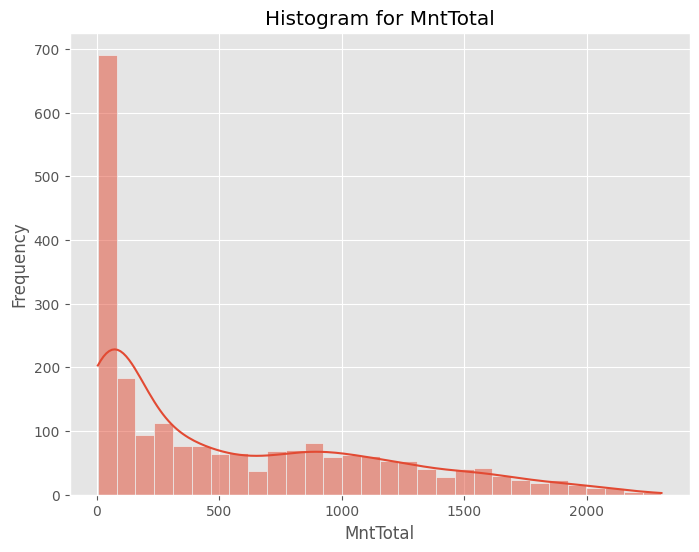

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=clean_df, x='MntTotal', bins=30, kde=True)
plt.title('Histogram for MntTotal')
plt.xlabel('MntTotal')
plt.ylabel('Frequency')
plt.show()

In [ ]:
clean_df.shape

(2201, 37)

**Корреляционная матрица.**

В данных много столбцов. Корреляционная матрица будет очень переполненной, если мы будем использовать все столбцы фрейма данных.

Мы сгруппируем столбцы и исследуем корреляцию между столбцами в каждой группе и столбцом "MntTotal". Есть смысл сосредоточиться на столбце "MntTotal", чтобы понять, как мы можем сегментировать клиентов, которые покупают больше всего в целом. Мы можем провести аналогичный анализ для каждого типа продукта.

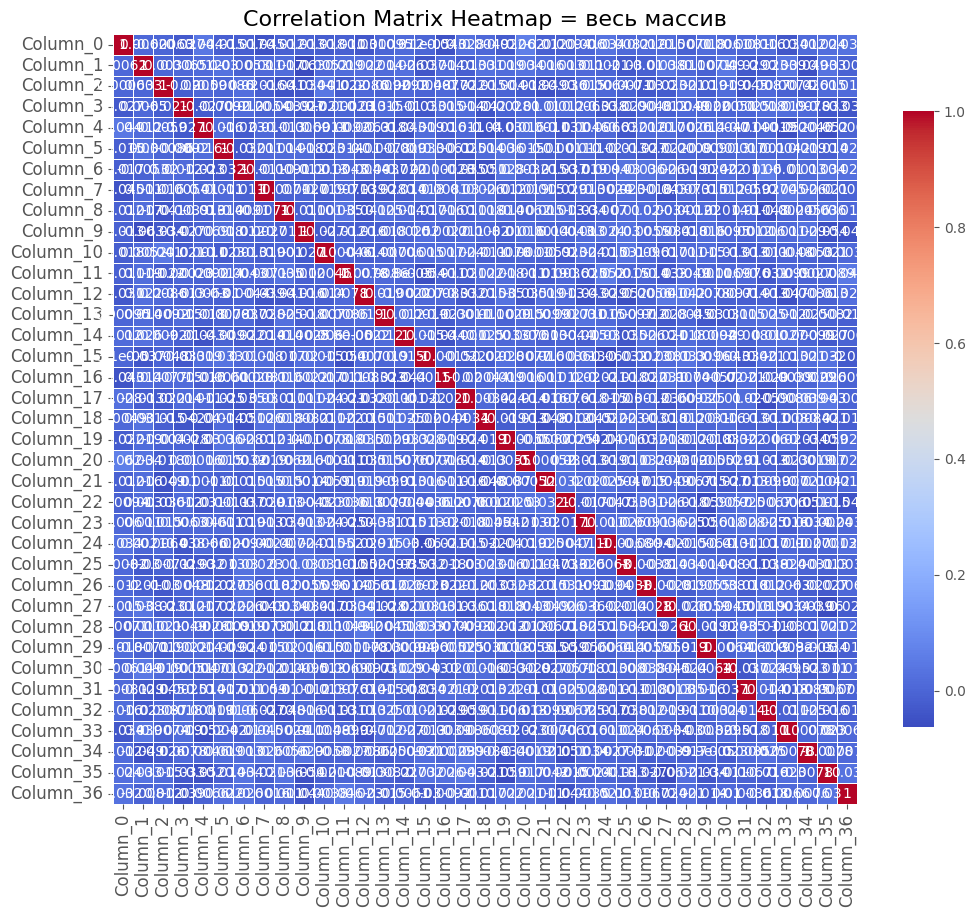

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Пример массива размером (2201, 37)
data = np.random.rand(2201, 37)

# Преобразуем массив в DataFrame
columns = [f'Column_{i}' for i in range(data.shape[1])]
clean_df_all = pd.DataFrame(data, columns=columns)

# Вычисляем корреляционную матрицу
corr_matrix_all = clean_df_all.corr()

# Построение тепловой карты
plt.figure(figsize=(12, 10))  # Увеличиваем размер фигуры для лучшей читаемости
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap = весь массив', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Выбираем нужные и имеющие ценность для нас.

In [ ]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

ПОСТРОИМ МАТРИЦУ ДЛЯ ОТОБРАННЫХ КОЛОНОК

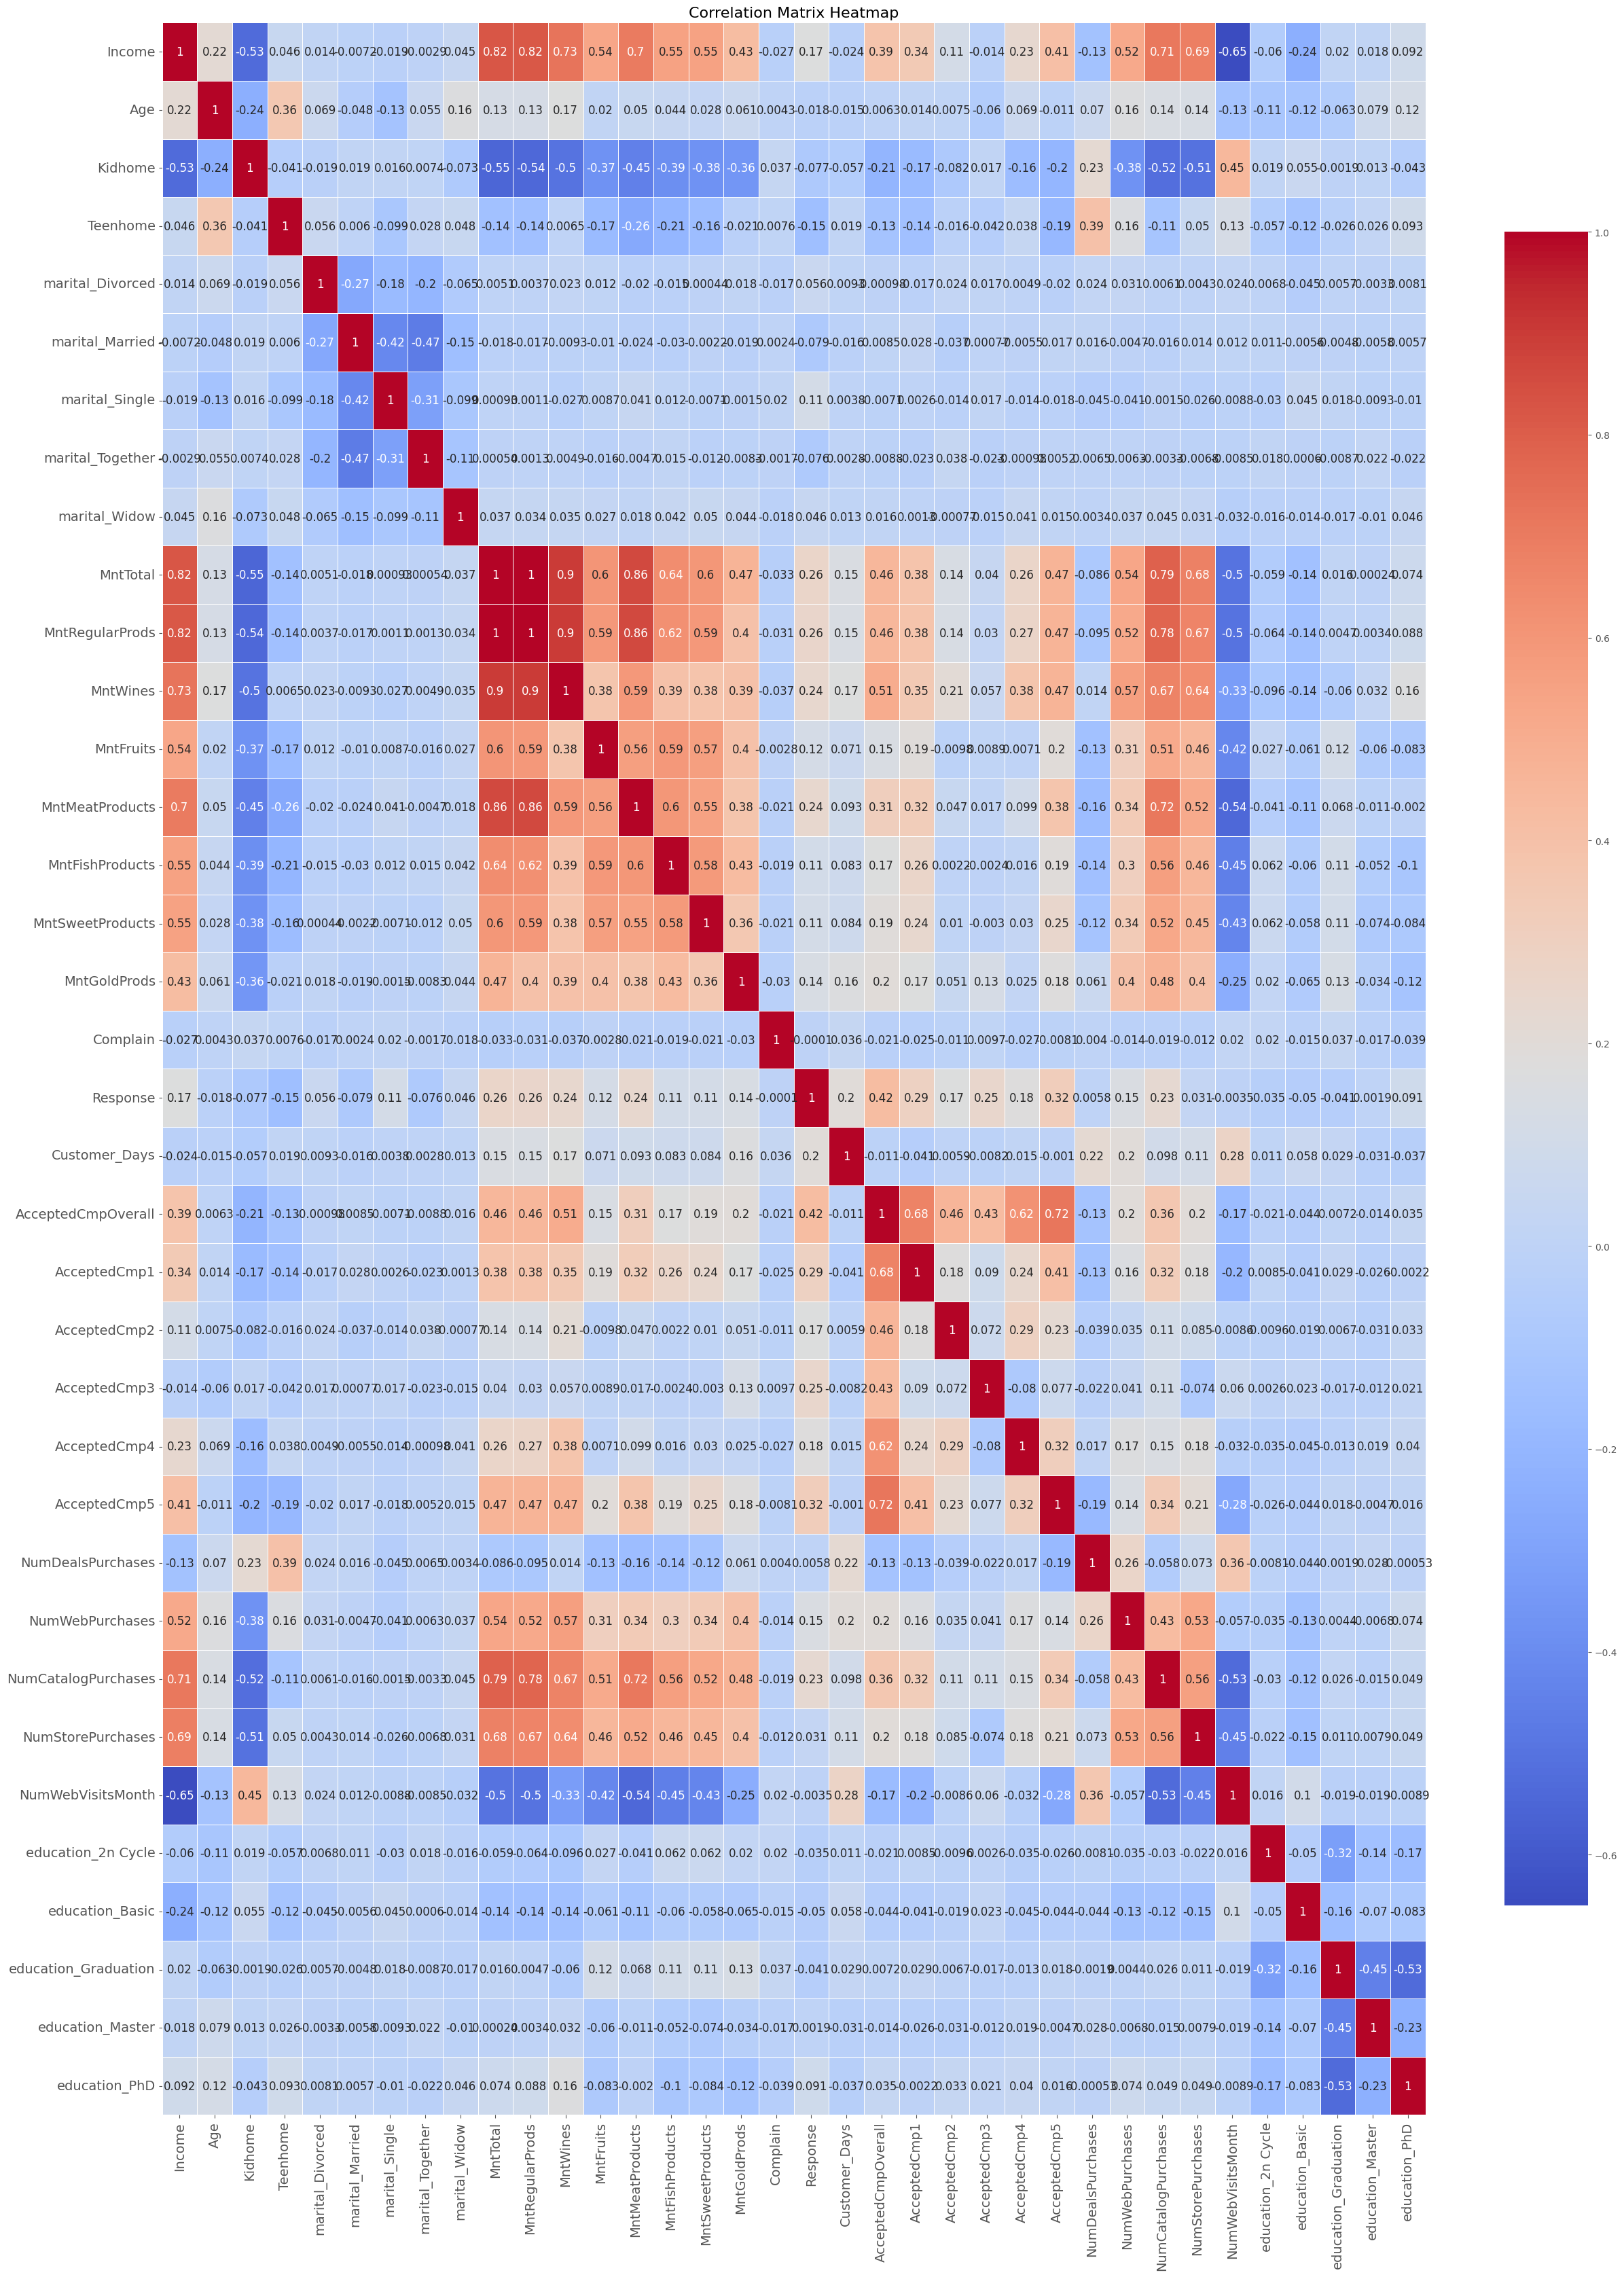

In [ ]:
# Создаем корреляционную матрицу
corr_matrix_demo= clean_df[cols_demographics + cols_children + cols_marital + cols_mnt + cols_communication + cols_campaigns + cols_source_of_purchase + cols_education].corr()

# Строим тепловую карту с увеличенными цифрами и подписями
plt.figure(figsize=(30, 40))
sns.heatmap(corr_matrix_demo, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Матрица получилась слишком большой, поэтому сосредоточися на демографических признаках и сумме расходов, которые нам интересны.

cols_demographics = ['Income','Age']

cols_children = ['Kidhome', 'Teenhome']

1. Income
•	Описание: Доход клиента.
•	Единица измерения: Обычно в долларах или другой валюте.
2. Kidhome
•	Описание: Количество детей младшего возраста (до 12 лет) в семье клиента.
•	Единица измерения: Целое число.
3. Teenhome
•	Описание: Количество подростков (от 13 до 19 лет) в семье клиента.
•	Единица измерения: Целое число.


Построим матрцу

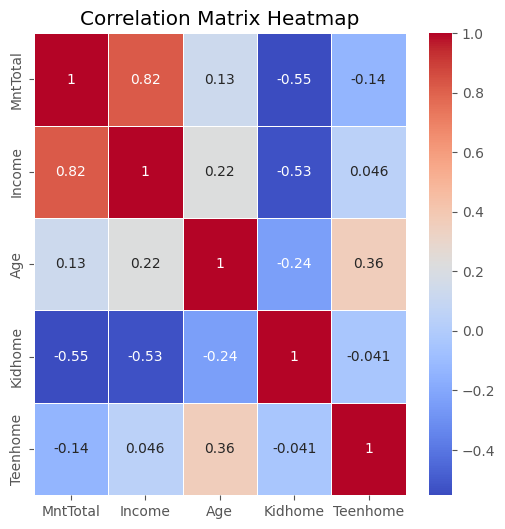

In [ ]:
corr_matrix_MntTotal = clean_df[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix_MntTotal, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

MntTotal имеет сильную положительную корреляцию с доходом и промежуточную отрицательную корреляцию с Kidhome. Функция дохода имеет почти такую же отрицательную корреляцию с Kidhome и MntTotal.

Можно было бы применить - точечно-бисериальную корреляцию для бинарных переменных. Но мы на этом останавливаться не булем, нас в принципе так все устраивает.

Далее мы будем еще делать стандартизацию массива.

Новая функция: In_relationship

Есть 3 признака, которые отражают, одинок ли человек (холост, разведен, вдова) и 2 признака, состоит ли человек в отношениях (вместе, женат). Мы добавим дополнительную функцию "In_relationship".

Эта функция будет равна 1, если семейное положение клиента "Женат" или "Вместе", и 0 во всех остальных случаях.

In [ ]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
clean_df['In_relationship'] = clean_df.apply(get_relationship, axis=1)
clean_df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Widow  \
0              172                88            88  ...              0   
1                2                 1             6  ...              0   
2              111                21            42  ...              0   
3               10                 3             5  ...              0   
4               46                27            15  ...              0   

   education_2n Cycle  education_Basic  education_Graduation  \
0                   0                0                     1   
1                   0                0                     1   
2                   0                0                     1   
3                   0                0                     1   
4                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  In_relationship  
0                   0                0  
1                   0                0  
2                   0                1  
3                   0                1  
4                   0                1  

[5 rows x 38 columns]

**Кластеризация K-средних**

Кластеризация K-средних - это неконтролируемый алгоритм машинного обучения, используемый для кластеризации данных на основе сходства.

 Кластеризация K-средних обычно хорошо работает на практике и хорошо масштабируется для больших наборов данных.

**StandardScaler**

**Стандартизация данных**

Алгоритм кластеризации K-средних основан на вычислении расстояний между точками данных для формирования кластеров.

Когда объекты имеют разный масштаб, объекты большего масштаба могут непропорционально влиять на расчет расстояния. Существуют различные способы стандартизации функций, мы будем использовать стандартное масштабирование .


Далее массив пока назовем

standard_df

In [ ]:
# весь наш массив стандартизируем

standard_scaler = StandardScaler()
standard_df = pd.DataFrame(data = standard_scaler.fit_transform(clean_df), index = clean_df.index, columns = clean_df.columns)
standard_df

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     0.316935 -0.824661 -0.931501  0.309638  0.981640   1.559552   
1    -0.254064  1.036959  0.905626 -0.381797 -0.875066  -0.638144   
2     0.969320 -0.824661 -0.931501 -0.796659  0.359763   0.574378   
3    -1.207732  1.036959 -0.931501 -0.796659 -0.875066  -0.562362   
4     0.324440  1.036959 -0.931501  1.554222 -0.393036   0.422813   
...        ...       ...       ...       ...       ...        ...   
2200  0.466294 -0.824661  0.905626 -0.105223  1.201826   0.422813   
2201  0.601418  2.898578  0.905626  0.240494  0.300253  -0.663405   
2202  0.260920 -0.824661 -0.931501  1.450506  1.793949   0.549117   
2203  0.854674 -0.824661  0.905626 -1.418950  0.365714   0.094421   
2204  0.061840  1.036959  0.905626 -0.312654 -0.657855  -0.587622   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0            1.764285         2.450116          1.491142      0.858035  ...   
1           -0.732379        -0.651174         -0.634793     -0.737011  ...   
2           -0.172941         1.337300         -0.146072     -0.036747  ...   
3           -0.667651        -0.505231         -0.585921     -0.756463  ...   
4           -0.214553         0.151513          0.000544     -0.561945  ...   
...               ...              ...               ...           ...  ...   
2200         0.081348         0.078541          2.224223      3.950869  ...   
2201        -0.621416        -0.687660         -0.659229     -0.698108  ...   
2202         0.243169        -0.103887         -0.365996     -0.386879  ...   
2203         0.229299         0.771771          0.073852      0.332837  ...   
2204        -0.478089        -0.651174         -0.634793     -0.445235  ...   

      marital_Widow  education_2n Cycle  education_Basic  \
0         -0.189116           -0.314407        -0.158592   
1         -0.189116           -0.314407        -0.158592   
2         -0.189116           -0.314407        -0.158592   
3         -0.189116           -0.314407        -0.158592   
4         -0.189116           -0.314407        -0.158592   
...             ...                 ...              ...   
2200      -0.189116           -0.314407        -0.158592   
2201      -0.189116           -0.314407        -0.158592   
2202      -0.189116           -0.314407        -0.158592   
2203      -0.189116           -0.314407        -0.158592   
2204      -0.189116           -0.314407        -0.158592   

      education_Graduation  education_Master  education_PhD  MntTotal  \
0                 0.990504         -0.443673      -0.525302  1.693336   
1                 0.990504         -0.443673      -0.525302 -0.943080   
2                 0.990504         -0.443673      -0.525302  0.303448   
3                 0.990504         -0.443673      -0.525302 -0.895877   
4                -1.009587         -0.443673       1.903667 -0.268242   
...                    ...               ...            ...       ...   
2200              0.990504         -0.443673      -0.525302  0.932831   
2201             -1.009587         -0.443673       1.903667 -0.217541   
2202              0.990504         -0.443673      -0.525302  1.147871   
2203             -1.009587          2.253910      -0.525302  0.387366   
2204             -1.009587         -0.443673       1.903667 -0.715803   

      MntRegularProds  AcceptedCmpOverall  In_relationship  
0            1.681755           -0.438858         -1.34840  
1           -0.912395           -0.438858         -1.34840  
2            0.319189           -0.438858          0.74162  
3           -0.861458           -0.438858          0.74162  
4           -0.226564           -0.438858          0.74162  
...               ...                 ...              ...  
2200         0.601162           -0.438858          0.74162  
2201        -0.161074            1.035840          0.74162  
2202         1.230598            1.035840         -1.34840  
2203         0.371946 

Для того чтобы проверить, что мы ничего не упустили, давайте посмотрим на ящики с усами (boxplot). Это позволит нам посмотреть на выбросы явные.

<Axes: >

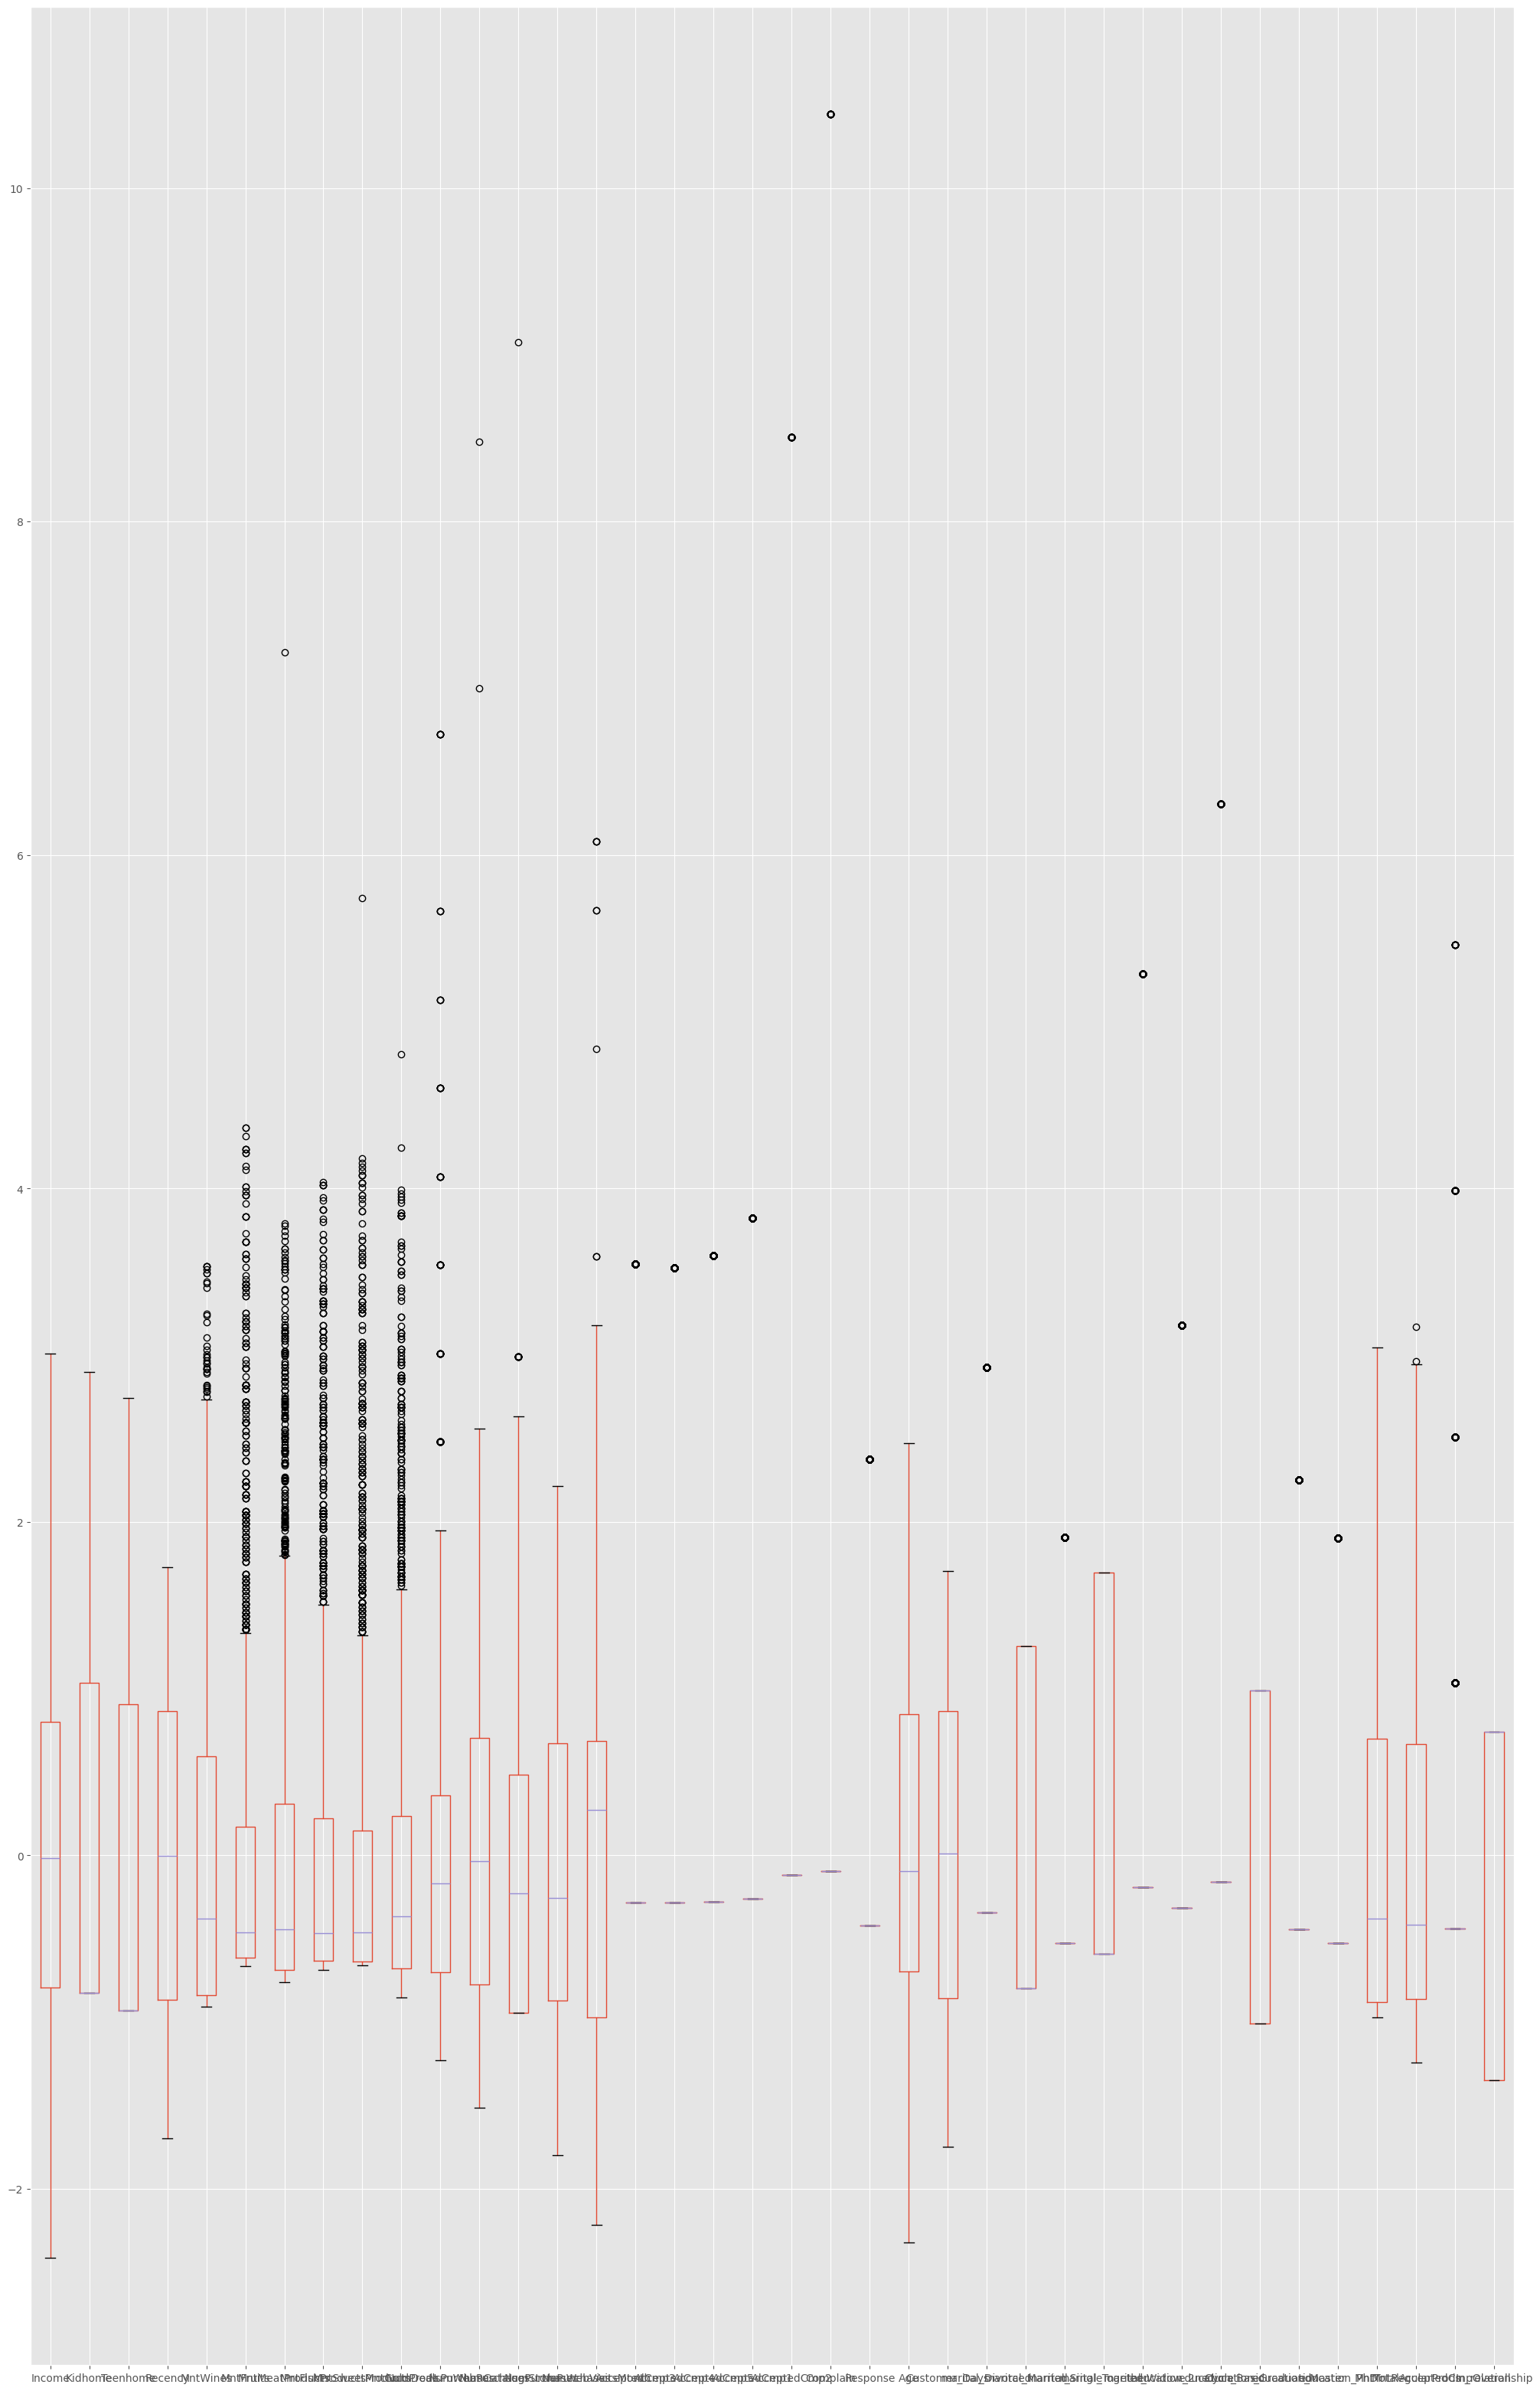

In [ ]:
standard_df.boxplot(figsize=(25,40))

Проверим наши колонки с нужными данными.

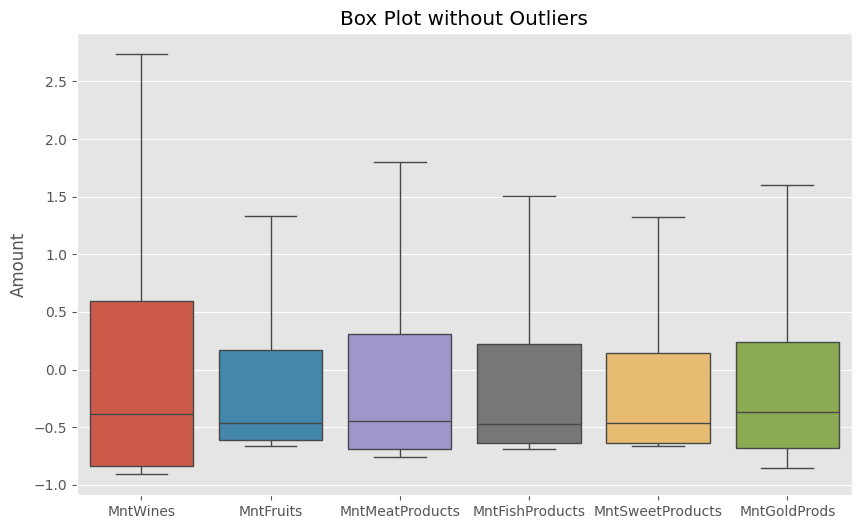

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=standard_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']], showfliers=False)
plt.title('Box Plot without Outliers')
plt.ylabel('Amount')
plt.show()

Удалим явные выбросы по нашим колонкам, применим квантильный размах.

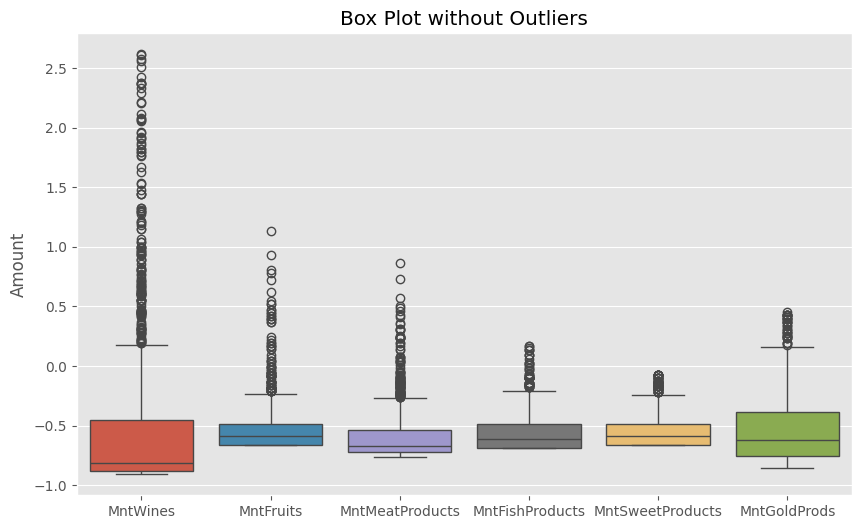

        Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
1    -0.254064  1.036959  0.905626 -0.381797 -0.875066  -0.638144   
3    -1.207732  1.036959 -0.931501 -0.796659 -0.875066  -0.562362   
7    -0.878126  1.036959 -0.931501 -0.589228 -0.681659  -0.410796   
8    -1.028356  1.036959 -0.931501 -1.038661 -0.866139  -0.663405   
9    -2.224338  1.036959  0.905626  0.655356 -0.824482  -0.663405   
...        ...       ...       ...       ...       ...        ...   
2198 -1.199501 -0.824661 -0.931501  0.033064 -0.892919  -0.638144   
2199 -0.831310  1.036959 -0.931501  1.104789 -0.898870  -0.587622   
2201  0.601418  2.898578  0.905626  0.240494  0.300253  -0.663405   
2202  0.260920 -0.824661 -0.931501  1.450506  1.793949   0.549117   
2204  0.061840  1.036959  0.905626 -0.312654 -0.657855  -0.587622   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1           -0.732379        -0.651174         -0.634793     -0.737011  ...   
3           -

In [ ]:
# Создаем DataFrame
dff = pd.DataFrame(standard_df)

# Функция для удаления выбросов
def remove_outliers(dff, columns):
    for col in columns:
        Q1 = dff[col].quantile(0.25)
        Q3 = dff[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dff = dff[(dff[col] >= lower_bound) & (dff[col] <= upper_bound)]
    return dff

# Удаляем выбросы из указанных столбцов
columns_to_clean = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_cleaned = remove_outliers(dff, columns_to_clean)

# Строим boxplot для очищенных данных
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[columns_to_clean])
plt.title('Box Plot without Outliers')
plt.ylabel('Amount')
plt.show()

# Выводим очищенный DataFrame
print(df_cleaned)

In [ ]:
df_cleaned          #  теперь наш массив имеет такое название

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
1    -0.254064  1.036959  0.905626 -0.381797 -0.875066  -0.638144   
3    -1.207732  1.036959 -0.931501 -0.796659 -0.875066  -0.562362   
7    -0.878126  1.036959 -0.931501 -0.589228 -0.681659  -0.410796   
8    -1.028356  1.036959 -0.931501 -1.038661 -0.866139  -0.663405   
9    -2.224338  1.036959  0.905626  0.655356 -0.824482  -0.663405   
...        ...       ...       ...       ...       ...        ...   
2198 -1.199501 -0.824661 -0.931501  0.033064 -0.892919  -0.638144   
2199 -0.831310  1.036959 -0.931501  1.104789 -0.898870  -0.587622   
2201  0.601418  2.898578  0.905626  0.240494  0.300253  -0.663405   
2202  0.260920 -0.824661 -0.931501  1.450506  1.793949   0.549117   
2204  0.061840  1.036959  0.905626 -0.312654 -0.657855  -0.587622   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1           -0.732379        -0.651174         -0.634793     -0.737011  ...   
3           -0.667651        -0.505231         -0.585921     -0.756463  ...   
7           -0.501207        -0.632931         -0.634793     -0.406331  ...   
8           -0.649157        -0.632931         -0.585921     -0.814819  ...   
9           -0.732379        -0.669417         -0.634793     -0.600849  ...   
...               ...              ...               ...           ...  ...   
2198        -0.732379        -0.632931         -0.561485     -0.795367  ...   
2199        -0.727756        -0.578202         -0.610357     -0.678656  ...   
2201        -0.621416        -0.687660         -0.659229     -0.698108  ...   
2202         0.243169        -0.103887         -0.365996     -0.386879  ...   
2204        -0.478089        -0.651174         -0.634793     -0.445235  ...   

      marital_Widow  education_2n Cycle  education_Basic  \
1         -0.189116           -0.314407        -0.158592   
3         -0.189116           -0.314407        -0.158592   
7         -0.189116           -0.314407        -0.158592   
8         -0.189116           -0.314407        -0.158592   
9         -0.189116           -0.314407        -0.158592   
...             ...                 ...              ...   
2198      -0.189116           -0.314407        -0.158592   
2199      -0.189116           -0.314407        -0.158592   
2201      -0.189116           -0.314407        -0.158592   
2202      -0.189116           -0.314407        -0.158592   
2204      -0.189116           -0.314407        -0.158592   

      education_Graduation  education_Master  education_PhD  MntTotal  \
1                 0.990504         -0.443673      -0.525302 -0.943080   
3                 0.990504         -0.443673      -0.525302 -0.895877   
7                -1.009587         -0.443673       1.903667 -0.724545   
8                -1.009587         -0.443673       1.903667 -0.902870   
9                -1.009587         -0.443673       1.903667 -0.916856   
...                    ...               ...            ...       ...   
2198              0.990504         -0.443673      -0.525302 -0.946577   
2199              0.990504         -0.443673      -0.525302 -0.943080   
2201             -1.009587         -0.443673       1.903667 -0.217541   
2202              0.990504         -0.443673      -0.525302  1.147871   
2204             -1.009587         -0.443673       1.903667 -0.715803   

      MntRegularProds  AcceptedCmpOverall  In_relationship  
1           -0.912395           -0.438858         -1.34840  
3           -0.861458           -0.438858          0.74162  
7           -0.715923           -0.438858          0.74162  
8           -0.863277           -0.438858          0.74162  
9           -0.897841            1.035840          0.74162  
...               ...                 ...              ...  
2198        -0.910576           -0.438858         -1.34840  
2199        -0.917852           -0.438858          0.74162  
2201        -0.161074            1.035840          0.74162  
2202         1.230598 

Посмотрим еще раз на наши колонки после преобразования

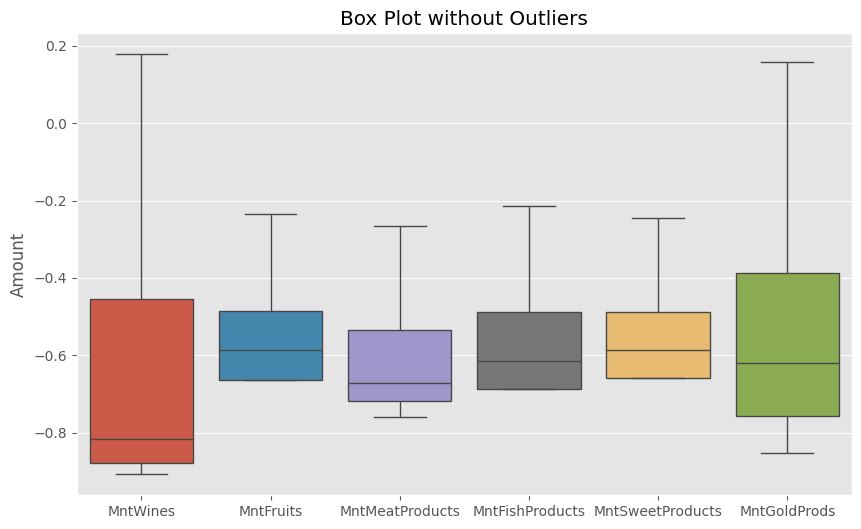

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']], showfliers=False)
plt.title('Box Plot without Outliers')
plt.ylabel('Amount')
plt.show()

График выше показал что все данные в общем то довольно неплохо стандартизировались. Есть конечно выбросы по крайним столбцам, но особо нас они не интересуют.

In [ ]:
df_cleaned.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'In_relationship'],
      dtype='object')

**Постановка задачи и построение модели.**

Наша задача — выяснить, могут ли предложенные данные быть разбиты каким-то образом на группы (кластеризованы), и, в случае утвердительного ответа, определить смысл полученных групп.

Для проведения кластеризации будем использовать метод k-means. Попытаемся определить адекватное число кластеров (изучим диапазон от 1 до 10).

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Применим график каменистой осыпи на нашем всем массиве после преобразования. df_cleaned

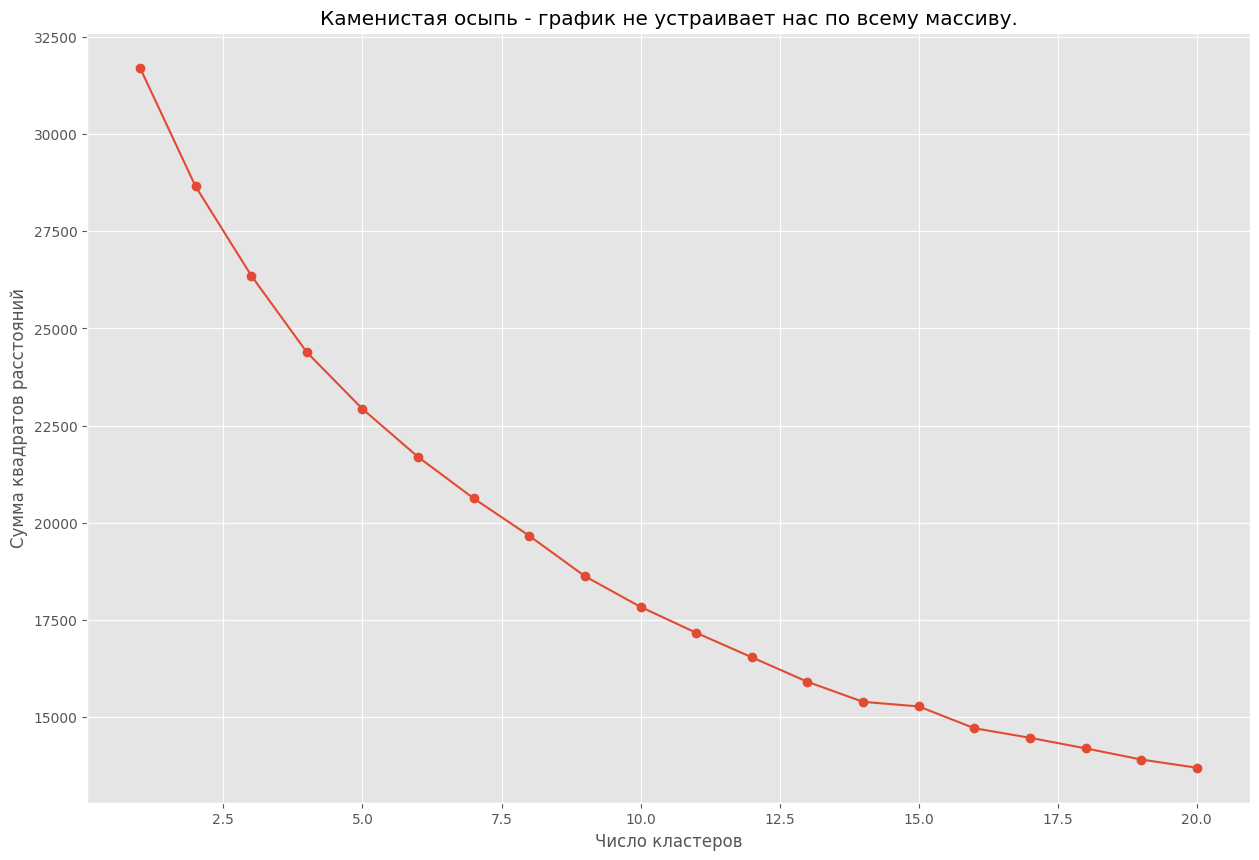

In [ ]:
K = range(1, 21)
models = [KMeans(n_clusters = k, random_state = 42, n_init = 100, max_iter = 10000).fit(df_cleaned) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(15,10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь - график не устраивает нас по всему массиву.')
plt.show()

Сделаем график "Каменистая осыпь" - для отобранных колонок для наших признаков.

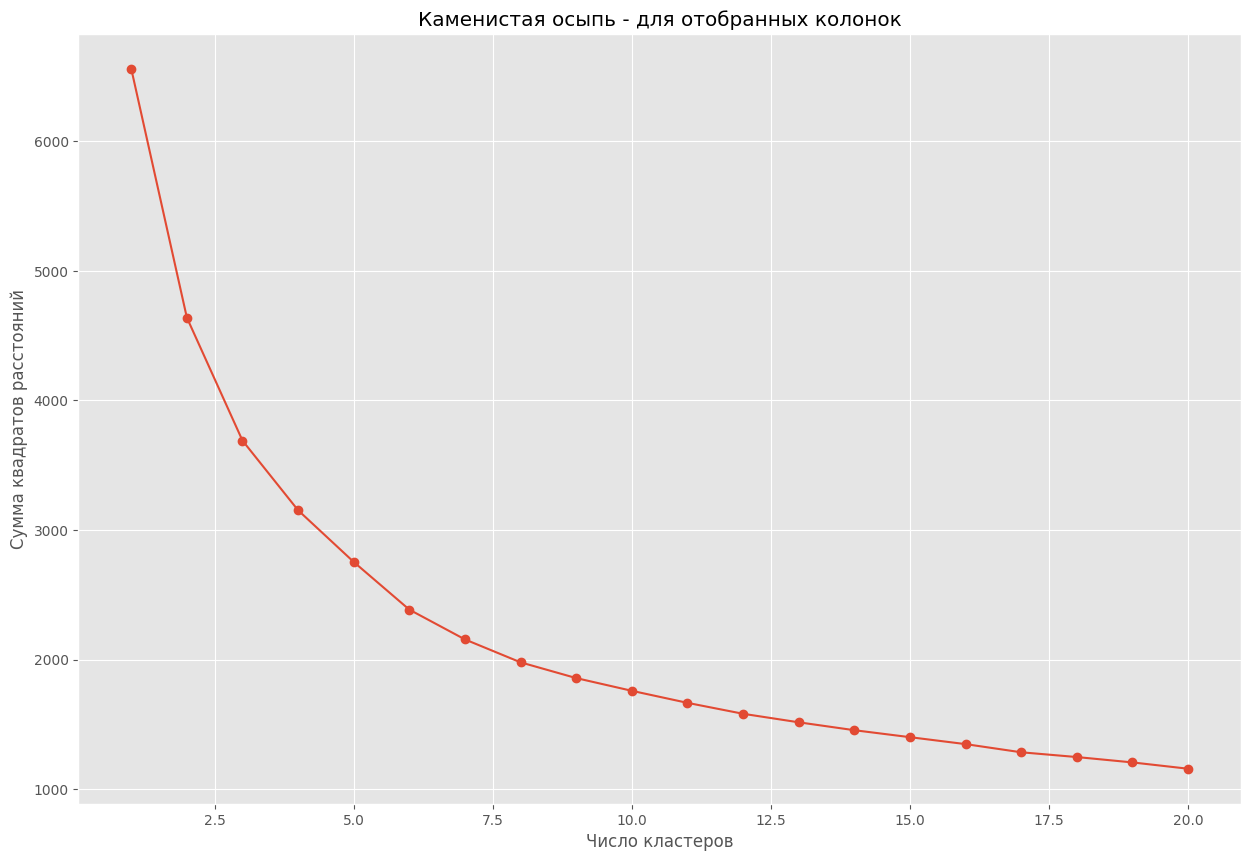

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Определяем диапазон кластеров
K = range(1, 21)

# Применяем KMeans для каждого числа кластеров
models = [KMeans(n_clusters=k, random_state=111, n_init=100, max_iter=10000).fit(df_cleaned[['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']]) for k in K]

# Вычисляем сумму квадратов расстояний для каждого модели
dist = [model.inertia_ for model in models]

# Строим график метода локтя
plt.figure(figsize=(15, 10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь - для отобранных колонок')
plt.show()

Выбираем 9 кластеров.

Строим каменистую осыпь для 9 кластеров и анализируем средние значения.

           Income   Kidhome  Teenhome  NumStorePurchases       Age  MntTotal  \
Cluster                                                                        
0       -1.184919 -0.824661 -0.896172          -0.847328  0.942027 -0.838318   
1       -1.036251  1.107572 -0.931501          -0.835941 -0.809310 -0.846310   
2       -0.026820 -0.824661  0.813770          -0.034138  0.571157 -0.289711   
3       -1.071101  1.074441 -0.931501          -0.858648 -0.807680 -0.855232   
4       -0.533307  1.195572  0.963294          -0.709049  0.325450 -0.790352   
5       -0.172811 -0.824661  1.061722          -0.295801  0.572611 -0.563234   
6       -0.515917  1.181270  1.005315          -0.734622  0.347507 -0.789421   
7        0.601013 -0.536553  0.555697           1.040761  0.202230  0.577555   
8       -1.312566 -0.824661 -0.869226          -0.829209 -1.337557 -0.847251   

         MntRegularProds  In_relationship  
Cluster                                    
0              -0.827418       

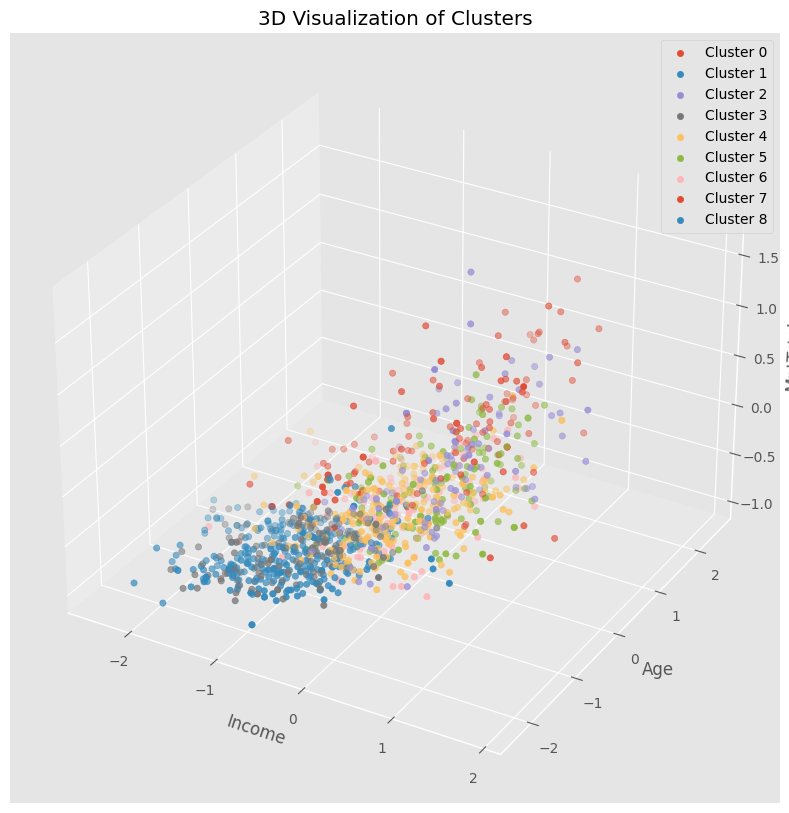

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Выбираем оптимальное количество кластеров

optimal_k = 9
# Применяем KMeans с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=optimal_k, random_state=111, n_init=100, max_iter=10000).fit(df_cleaned[['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']])

# Добавляем метки кластеров в DataFrame
df_cleaned['Cluster'] = kmeans.labels_

print(df_cleaned.groupby(df_cleaned['Cluster'])[['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']].mean())

# Выбираем три столбца для визуализации в 3D
columns_to_plot = ['Income', 'Age', 'MntTotal']

# Строим 3D график
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Рисуем точки с цветом, соответствующим кластеру
for cluster in range(optimal_k):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster]
    ax.scatter(cluster_data[columns_to_plot[0]], cluster_data[columns_to_plot[1]], cluster_data[columns_to_plot[2]], label=f'Cluster {cluster}')

# Настройка осей и заголовка
ax.set_xlabel(columns_to_plot[0])
ax.set_ylabel(columns_to_plot[1])
ax.set_zlabel(columns_to_plot[2])
ax.set_title('3D Visualization of Clusters')

# Добавляем легенду
ax.legend()

# Показываем график
plt.show()

Посмотри на  наши кластеры визульно и оценим.

Видим что уже в 9 кластере данных особо нет. поэтмоу скорее всего больше кластеров нам алгоритм и не сделает.

Проверим это далее.

           Income   Kidhome  Teenhome  NumStorePurchases       Age  MntTotal  \
Cluster                                                                        
0       -1.184919 -0.824661 -0.896172          -0.847328  0.942027 -0.838318   
1       -1.036251  1.107572 -0.931501          -0.835941 -0.809310 -0.846310   
2       -0.026820 -0.824661  0.813770          -0.034138  0.571157 -0.289711   
3       -1.071101  1.074441 -0.931501          -0.858648 -0.807680 -0.855232   
4       -0.533307  1.195572  0.963294          -0.709049  0.325450 -0.790352   
5       -0.172811 -0.824661  1.061722          -0.295801  0.572611 -0.563234   
6       -0.515917  1.181270  1.005315          -0.734622  0.347507 -0.789421   
7        0.601013 -0.536553  0.555697           1.040761  0.202230  0.577555   
8       -1.312566 -0.824661 -0.869226          -0.829209 -1.337557 -0.847251   

         MntRegularProds  In_relationship  
Cluster                                    
0              -0.827418       

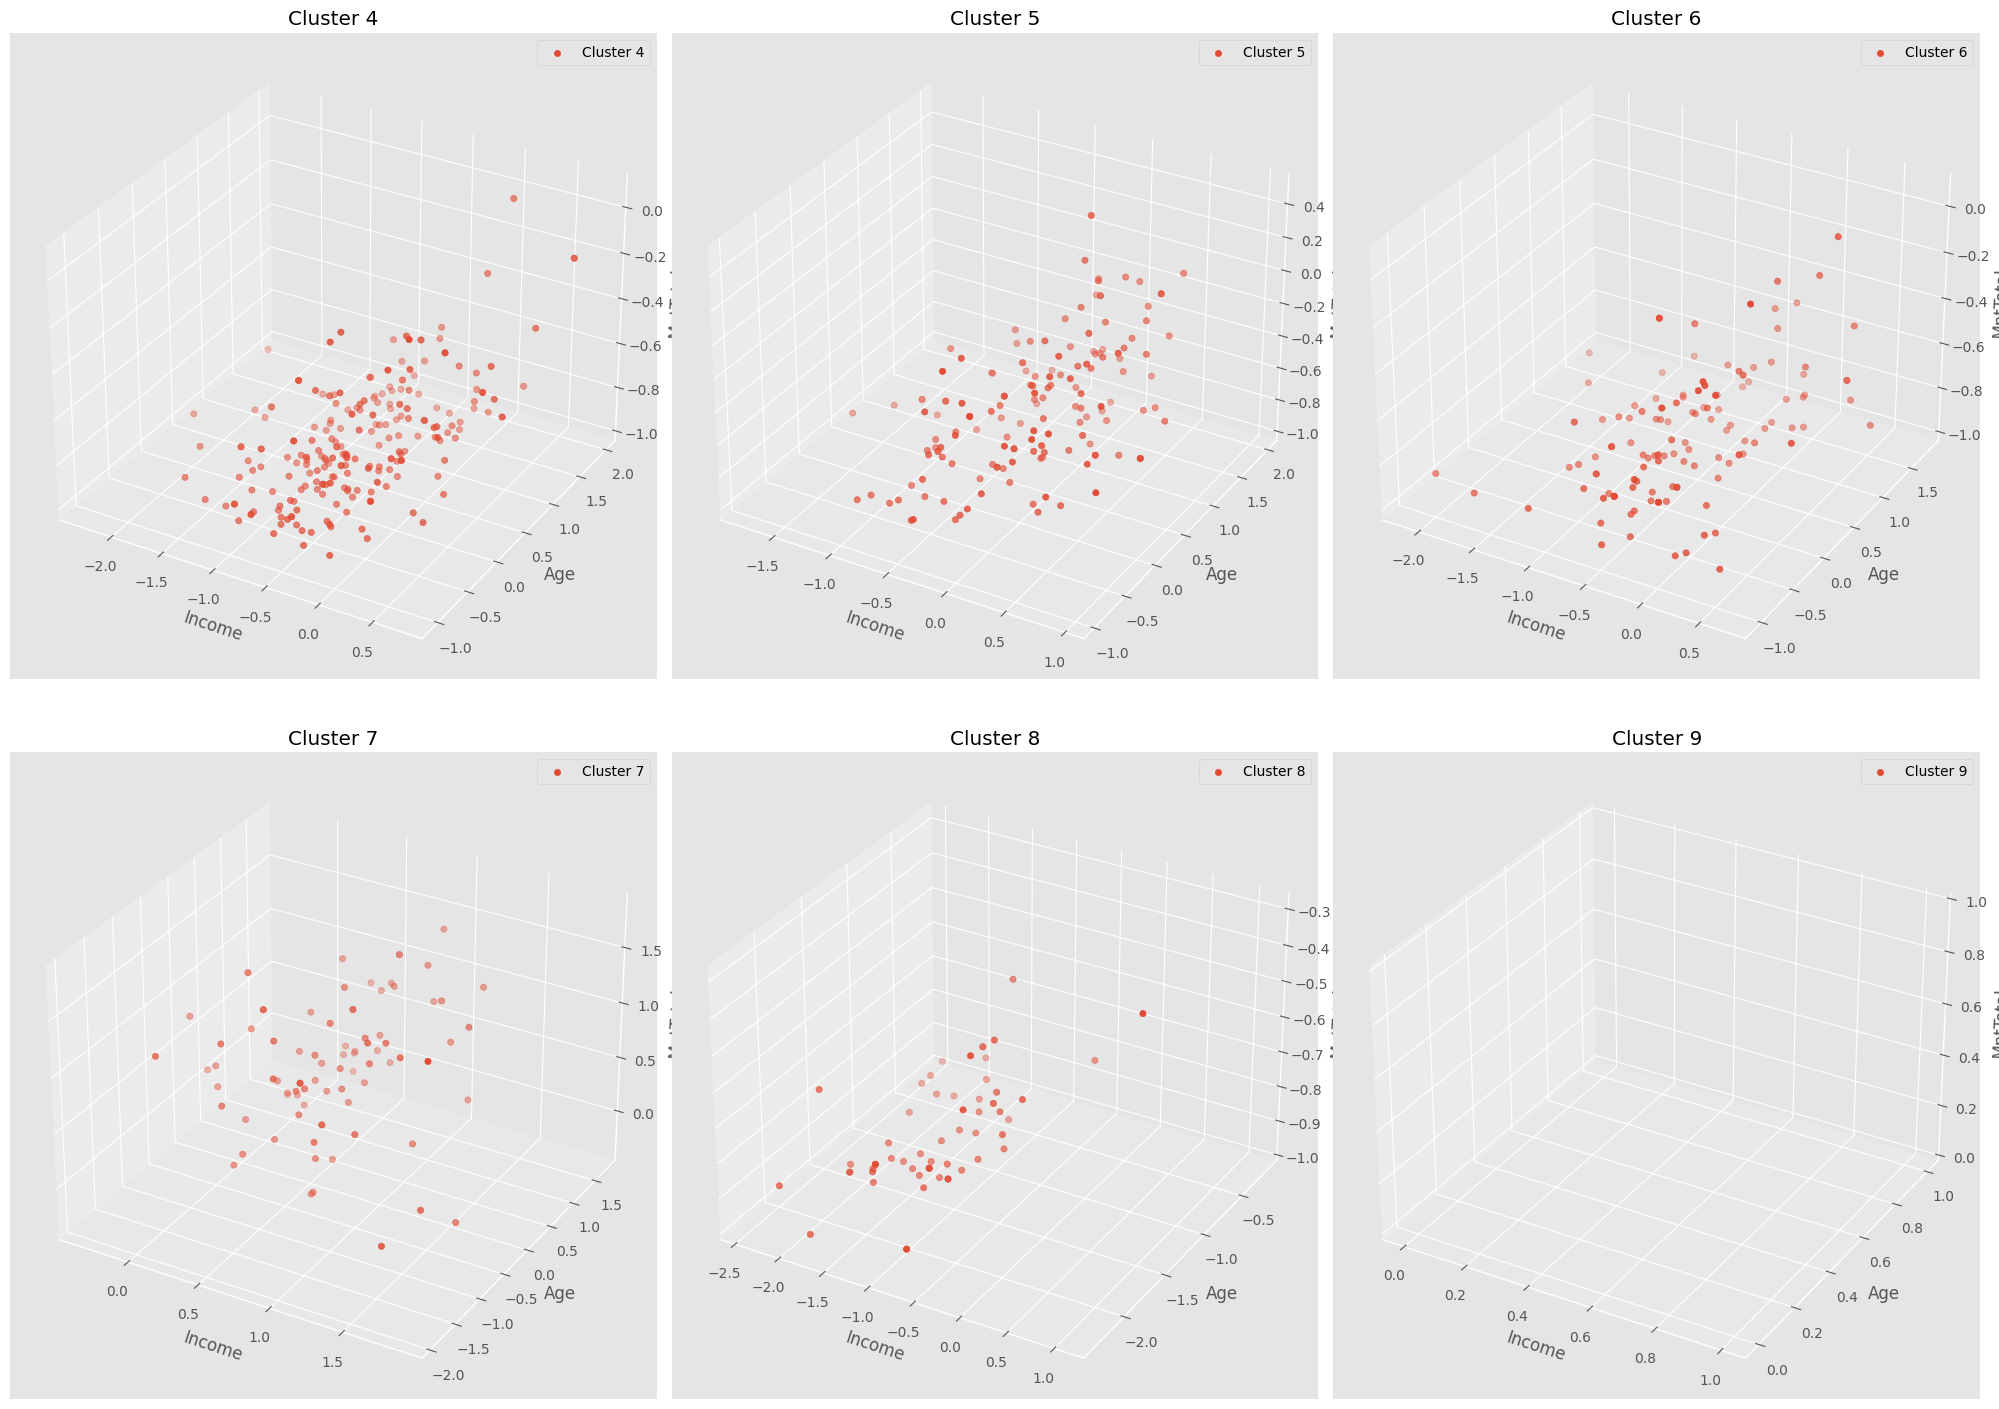

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Предположим, что у вас есть DataFrame df_cleaned с данными
# Выбираем оптимальное количество кластеров
optimal_k = 9

# Применяем KMeans с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=optimal_k, random_state=111, n_init=100, max_iter=10000).fit(df_cleaned[['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']])

# Добавляем метки кластеров в DataFrame
df_cleaned['Cluster'] = kmeans.labels_

print(df_cleaned.groupby(df_cleaned['Cluster'])[['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']].mean())

# Выбираем три столбца для визуализации в 3D
columns_to_plot = ['Income', 'Age', 'MntTotal']

# Создаем фигуру с несколькими подграфиками
fig, axes = plt.subplots(2, 3, figsize=(20, 15), subplot_kw={'projection': '3d'})

# Строим 3D графики для кластеров с 4 по 9
for i, cluster in enumerate(range(4, 10)):
    ax = axes[i // 3, i % 3]
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster]
    ax.scatter(cluster_data[columns_to_plot[0]], cluster_data[columns_to_plot[1]], cluster_data[columns_to_plot[2]], label=f'Cluster {cluster}')
    ax.set_xlabel(columns_to_plot[0])
    ax.set_ylabel(columns_to_plot[1])
    ax.set_zlabel(columns_to_plot[2])
    ax.set_title(f'Cluster {cluster}')
    ax.legend()

# Показываем графики
plt.tight_layout()
plt.show()

**Silhouette score analysis - применим алгоритм Анализ оценки силуэта.**

Оценка силуэта - это показатель, используемый для оценки качества кластеризации. Более высокая оценка силуэта указывает на то, что кластеры хорошо разделены, в то время как более низкая оценка предполагает, что кластеры могут перекрываться или плохо определены.

Метод позволяет определить точное количество кластеров.

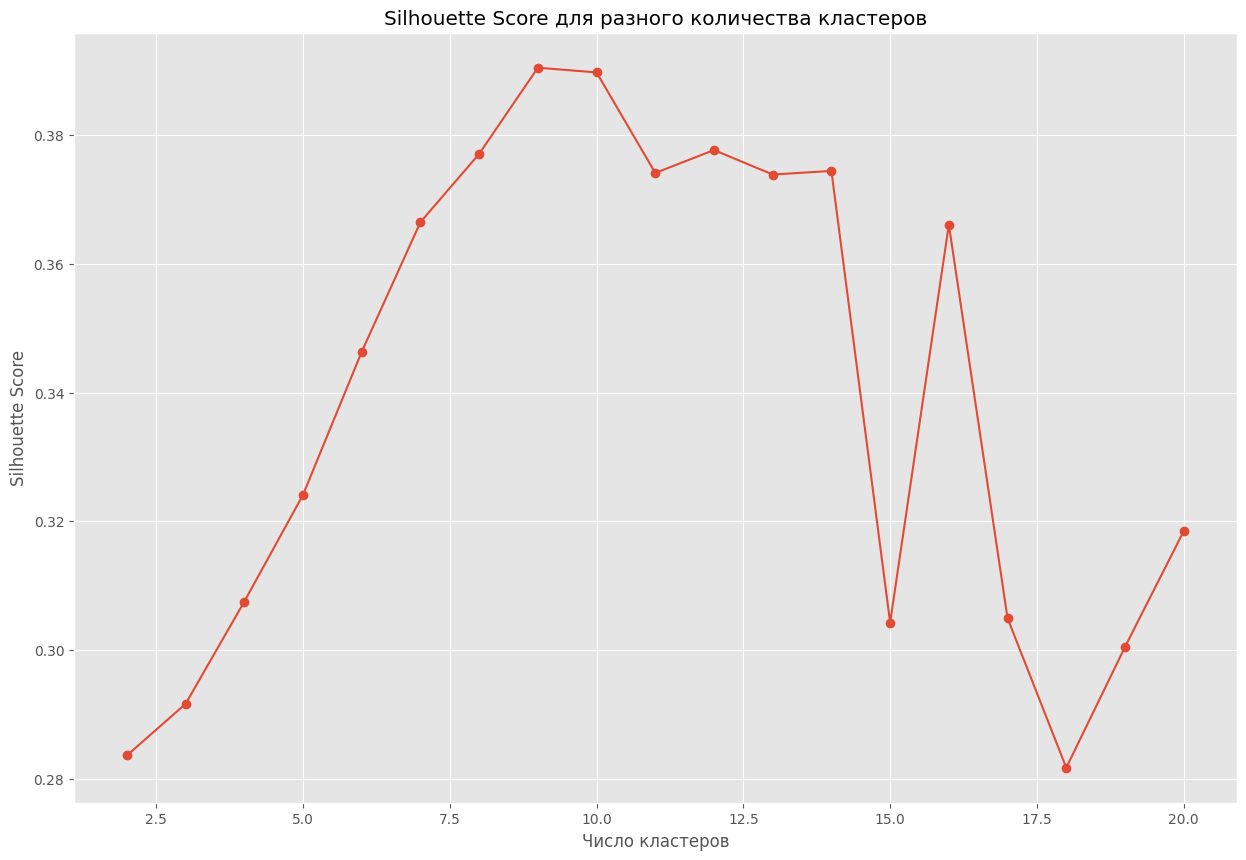

Оптимальное количество кластеров: 9


In [ ]:
from sklearn.metrics import silhouette_score

# Определяем диапазон кластеров
K = range(2, 21)  # Начинаем с 2, так как Silhouette Score не работает с 1 кластером

# Применяем KMeans для каждого числа кластеров
models = [KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=10000).fit(df_cleaned[['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']]) for k in K]

# Вычисляем Silhouette Score для каждого модели
silhouette_scores = [silhouette_score(df_cleaned[['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']], model.labels_) for model in models]

# Строим график Silhouette Score
plt.figure(figsize=(15, 10))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score для разного количества кластеров')
plt.show()

# Определяем оптимальное количество кластеров
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f'Оптимальное количество кластеров: {optimal_k}')

**Silhouette Score** — это метрика, которая оценивает, насколько хорошо каждый объект данных был назначен своему кластеру.

Он вычисляется для каждого объекта и затем усредняется по всем объектам. Silhouette Score может принимать значения от -1 до 1:


*   Значение близкое к 1:
Объект хорошо кластеризован, т.е. он находится далеко от соседних кластеров.

*   Значение близкое к 0:
Объект находится на границе между двумя кластерами.

*  Значение близкое к -1:
Объект назначен неправильному кластеру.

**Найдем Silhouette Score**
- для определения оптимального количества кластеров.

Чтобы определить оптимальное количество кластеров, мы вычисляем Silhouette Score для разного количества кластеров и выбираем то количество, которое дает максимальный Silhouette Score.

Для этого применятся метод PCA - метод главных компонент.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Выбираем столбцы для кластеризации
columns_to_cluster = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Применяем PCA для уменьшения размерности
pca = PCA(n_components = 2, svd_solver = 'full')  # Выбираем 2 главных компонента
X_pca = pca.fit_transform(df_cleaned[columns_to_cluster])

# Определяем диапазон кластеров
range_n_clusters = [ 2, 3, 4, 5, 6,7 , 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    # Применяем KMeans для каждого числа кластеров
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=100, max_iter=10000)
    cluster_labels = clusterer.fit_predict(X_pca)

    # Вычисляем Silhouette Score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

# Определяем оптимальное количество кластеров
optimal_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'Оптимальное количество кластеров: {optimal_k}')

For n_clusters = 2 The average silhouette_score is : 0.4335177737447228
For n_clusters = 3 The average silhouette_score is : 0.47211739557258847
For n_clusters = 4 The average silhouette_score is : 0.5234548778301048
For n_clusters = 5 The average silhouette_score is : 0.5561745313561145
For n_clusters = 6 The average silhouette_score is : 0.5801547752875668
For n_clusters = 7 The average silhouette_score is : 0.5569532482645796
For n_clusters = 8 The average silhouette_score is : 0.5432818199093725
For n_clusters = 9 The average silhouette_score is : 0.517398542736534
For n_clusters = 10 The average silhouette_score is : 0.47054794597738414
For n_clusters = 11 The average silhouette_score is : 0.44701391725511047
Оптимальное количество кластеров: 9


Мы видим что после 9 кластера значения убывают.

Можно видеть что 2 ГК вполне хватает для определения наших кластеров, далее мы посмотрим отдельно метод ГК PCA для уменьшения размерности.

In [ ]:
X_pca[0]

array([ 0.63057839, -0.95750795])

In [ ]:
pca.components_.shape

(2, 8)

In [ ]:
pca.components_

array([[ 3.70406997e-01, -4.14825655e-01,  5.36575123e-01,
         3.10475312e-01,  4.67825235e-01,  2.07606004e-01,
         2.10720131e-01,  6.84643823e-03],
       [ 7.56362014e-04,  1.88726568e-01,  1.36483080e-01,
        -4.31778869e-02,  6.29275461e-02, -4.29317632e-02,
        -4.25692630e-02,  9.67612833e-01]])

**Применяем PCA для уменьшения размерности.**

In [ ]:
from sklearn.decomposition import PCA
# Применяем PCA для уменьшения размерности

columns_to_cluster_pca = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

pca_model = PCA(n_components = 2, svd_solver = 'full')
pca_model.fit(df_cleaned[columns_to_cluster_pca])
pca_data = pca_model.transform(df_cleaned[columns_to_cluster_pca])


In [ ]:
pca_data[0]

array([ 0.63057839, -0.95750795])

In [ ]:
pca.components_.shape

(2, 8)

In [ ]:
pca.components_

array([[ 3.70406997e-01, -4.14825655e-01,  5.36575123e-01,
         3.10475312e-01,  4.67825235e-01,  2.07606004e-01,
         2.10720131e-01,  6.84643823e-03],
       [ 7.56362014e-04,  1.88726568e-01,  1.36483080e-01,
        -4.31778869e-02,  6.29275461e-02, -4.29317632e-02,
        -4.25692630e-02,  9.67612833e-01]])

**Интерпретация весов:**

**Первая главная компонента (PC1):**

Положительный вес для Income, Kidhome, Teenhome, NumStorePurchases, Age, MntTotal, MntRegularProds.

Очень маленький вес для In_relationship.

**Вторая главная компонента (PC2):**

Очень маленький вес для Income, Kidhome, Teenhome, NumStorePurchases, Age, MntTotal, MntRegularProds.

Большой положительный вес для In_relationship.

Веса главных компонент показывают, как каждый признак влияет на главную компоненту.

Положительный вес означает, что увеличение значения признака приводит к увеличению значения главной компоненты.

Отрицательный вес означает, что увеличение значения признака приводит к уменьшению значения главной компоненты.

   **ПОСМОТРИМ НА НАШИ КОМПОНЕНТЫ И ВЛИЯНИЕ НА НАШИ ДАННЫЕ**

Построим диаграмму весов главных компонент

Weights of Principal Components:
[[ 3.70406997e-01 -4.14825655e-01  5.36575123e-01  3.10475312e-01
   4.67825235e-01  2.07606004e-01  2.10720131e-01  6.84643823e-03]
 [ 7.56362014e-04  1.88726568e-01  1.36483080e-01 -4.31778869e-02
   6.29275461e-02 -4.29317632e-02 -4.25692630e-02  9.67612833e-01]]


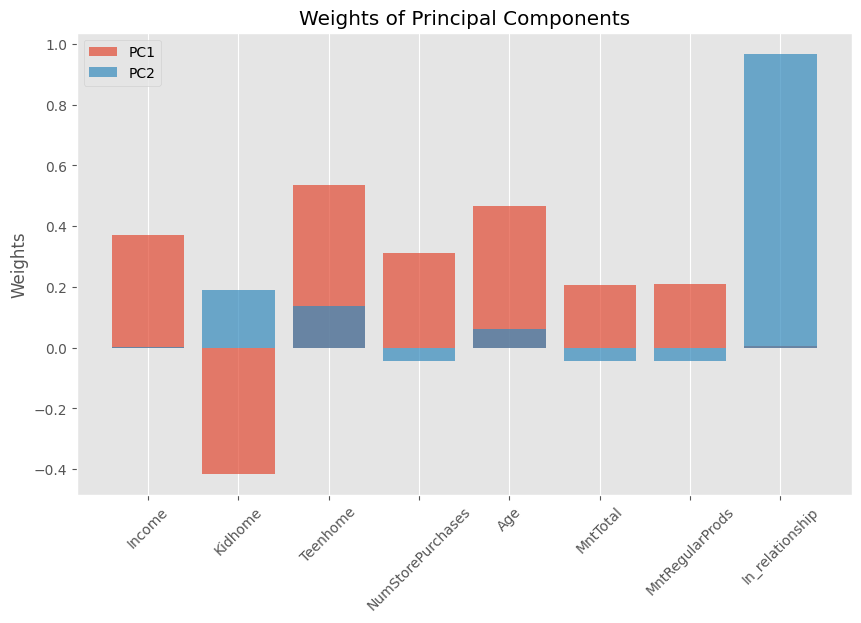

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

columns_to_cluster_pca = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Создаем модель PCA
pca_model_vesa = PCA(n_components=2)

# Обучаем модель на данных
pca_model_vesa.fit(df_cleaned[columns_to_cluster_pca])

# Получаем веса главных компонент
components = pca_model_vesa.components_

# Выводим веса главных компонент
print("Weights of Principal Components:")
print(components)

# Визуализация весов
plt.figure(figsize=(10, 6))
for i, component in enumerate(components):
    plt.bar(range(len(component)), component, alpha=0.7, label=f'PC{i+1}')

plt.xticks(range(len(component)), columns_to_cluster_pca, rotation=45)
plt.ylabel('Weights')
plt.title('Weights of Principal Components')
plt.legend()
plt.grid(axis='y')
plt.show()

**Посмотрим сколько же нам выбрать главных компонент, для этого применим метод PCA для всех отобранных наших признаков.**

In [ ]:

columns_to_cluster_pca = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

pca_model = PCA(n_components = 8, svd_solver = 'full')
pca_model.fit(df_cleaned[columns_to_cluster_pca])
pca_data = pca_model.transform(df_cleaned[columns_to_cluster_pca])

In [ ]:
pca_model.components_

array([[ 3.70406997e-01, -4.14825655e-01,  5.36575123e-01,
         3.10475312e-01,  4.67825235e-01,  2.07606004e-01,
         2.10720131e-01,  6.84643823e-03],
       [ 7.56362014e-04,  1.88726568e-01,  1.36483080e-01,
        -4.31778869e-02,  6.29275461e-02, -4.29317632e-02,
        -4.25692630e-02,  9.67612833e-01],
       [-8.03520690e-02,  6.06083271e-01,  4.69410014e-01,
        -2.81464897e-01,  4.32524923e-01, -1.99751605e-01,
        -2.01775585e-01, -2.42788928e-01],
       [ 4.18028039e-01,  5.99932999e-01,  9.33711469e-02,
         3.87464813e-01, -4.00571410e-01,  2.63751072e-01,
         2.69100678e-01, -6.36281911e-02],
       [-7.45382814e-02, -2.41789963e-01,  6.55316782e-01,
        -1.69971071e-01, -6.54727608e-01, -1.54682791e-01,
        -1.56467140e-01, -2.39674067e-02],
       [ 8.16815347e-01, -8.09910564e-02, -1.79067163e-01,
        -4.58094608e-01, -2.63367060e-02, -2.03087438e-01,
        -2.05879073e-01,  3.61892554e-03],
       [ 9.40792285e-02, -4.732334

Доля объясненной дисперсии для каждой ГК хранится в поле explained_variance_ratio_, используем сумму с накоплением: np.cumsum.

In [ ]:
pca_model.explained_variance_

array([2.10295353e+00, 9.98788470e-01, 9.48603533e-01, 6.12533136e-01,
       4.01343860e-01, 1.64610061e-01, 6.88778685e-02, 2.95621052e-04])

In [ ]:
pca_model.explained_variance_ratio_

array([3.96933015e-01, 1.88521579e-01, 1.79049159e-01, 1.15615786e-01,
       7.57537560e-02, 3.10701911e-02, 1.30007153e-02, 5.57985491e-05])

In [ ]:
explained_variance = np.cumsum(pca_model.explained_variance_ratio_)
explained_variance

array([0.39693302, 0.58545459, 0.76450375, 0.88011954, 0.9558733 ,
       0.98694349, 0.9999442 , 1.        ])

In [ ]:
pca_model.components_.shape

(8, 8)

Построим график зависимости доли объясненной дисперсии от количества используемых ГК.

Размер массива explained_variance: (8,)


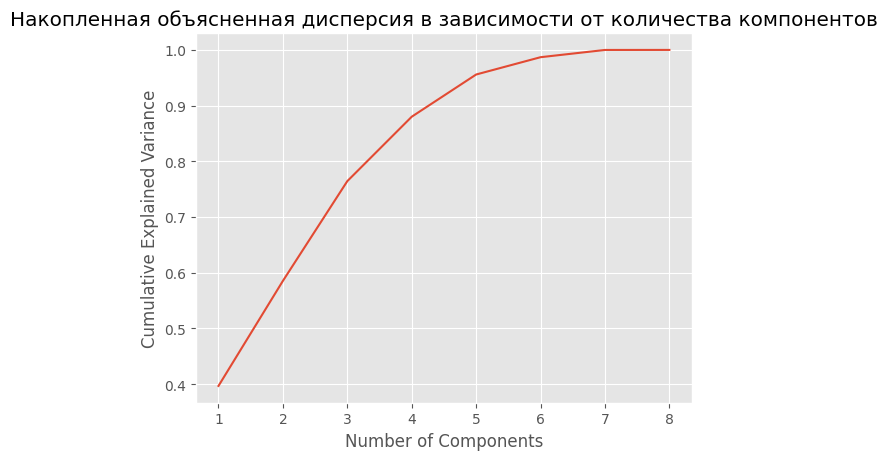

In [ ]:
explained_variance = np.cumsum(pca_model.explained_variance_ratio_)

# Проверка размера массива explained_variance
print("Размер массива explained_variance:", explained_variance.shape)

# Исправление строки plt.plot
num_components = explained_variance.shape[0]
plt.plot(np.arange(1, num_components + 1), explained_variance, ls='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Накопленная объясненная дисперсия в зависимости от количества компонентов')
plt.show()

Определим количество ГК, необходимых для превышения заданного порога доли объясненной дисперсии:

In [ ]:
treshold = 0.85
dim = 0
for value in explained_variance:
  if value > treshold:
    print('Минимальное количество ГК для заданного порога: ', dim + 1)
    break
  dim += 1

Минимальное количество ГК для заданного порога:  4


ЭТО ПОКАЗАТЕЛЬ ГОВОРИТ ЧТО МЕТОД ПОКАЗЫВАЕТ ЧТО ДОСТАТОЧНО 4 ГК ДЛЯ НАШЕЙ МОДЕЛИ НА ОСНОВЕ ПРЕДСТАВЛЕННЫХ 8 КОЛОНОК МАССИВА - для 8 признаков.

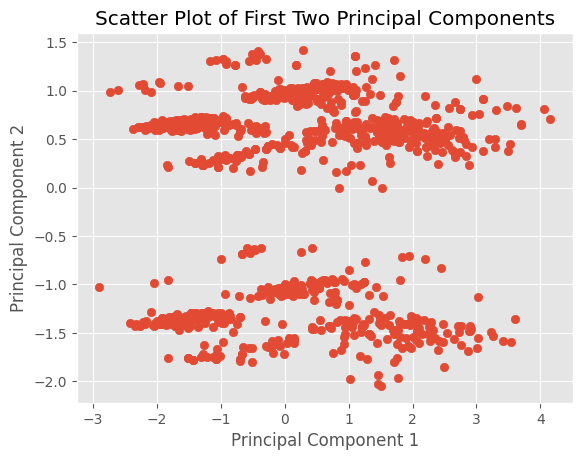

In [ ]:
#  графиК ДЛЯ 2 КОМПОНЕНТ

plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()

**Посмотрим и применим метод PCA для нашего всего массива после сандартизации без отбора колонок ( 8 признаков).**



И сделаем это для 4 ГК, так как мы определились, что нам надо 4 ГК.

In [ ]:
from sklearn.decomposition import PCA
# Применяем PCA для уменьшения размерности

pca_model_all = PCA(n_components = 4, svd_solver = 'full')         # загрузим весь массив и посмотрим что получится
pca_model_all.fit(df_cleaned)
pca_data_all = pca_model_all.transform(df_cleaned)


In [ ]:

pca_model_all.components_

array([[ 1.66002868e-01, -1.58788233e-01,  2.57224918e-01,
        -1.56129177e-02,  1.53394427e-01,  1.12930340e-02,
         3.66585289e-02,  4.51275549e-03,  3.44404829e-03,
         2.47252330e-02,  1.10168366e-01,  1.40946268e-01,
         9.05265805e-02,  1.48444133e-01, -7.32541873e-02,
        -2.15000220e-02,  1.17164084e-01,  2.63013945e-02,
         3.42526724e-02,  3.32442961e-02, -4.39928426e-03,
         1.39342837e-02,  1.24675677e-01,  2.52640839e-06,
         3.84780989e-02, -2.88939486e-02,  1.97874452e-02,
        -2.13977715e-02,  1.92984562e-02, -3.00602848e-02,
        -8.61030807e-02, -6.04562418e-02,  4.01035333e-02,
         9.05554896e-02,  1.05451169e-01,  1.07414801e-01,
         6.51587284e-02, -4.89785868e-02,  8.36682904e-01],
       [-2.16468915e-01,  1.58377495e-01, -1.04105368e-01,
        -2.98637377e-02, -2.34959132e-01, -2.22199616e-02,
        -5.99125411e-02, -1.17295368e-02, -1.00142523e-02,
        -5.08344938e-02, -1.48510978e-01, -3.03375088e-

In [ ]:
pca_model_all.explained_variance_    # мы видим хорошую доля дисперсии именно для 4-х ГК

array([6.16039395, 2.59512702, 2.27522045, 1.75365373])

In [ ]:
pca_model_all.explained_variance_ratio_  # Доля объясненной дисперсии для каждой ГК

array([0.20151229, 0.08488905, 0.0744246 , 0.05736367])

In [ ]:
explained_variance_all = np.cumsum(pca_model_all.explained_variance_ratio_)
explained_variance_all

array([0.20151229, 0.28640134, 0.36082595, 0.41818961])

**Посмотрим график дисперсии ГК** - для всего массива.

Размер массива explained_variance_all: (8,)


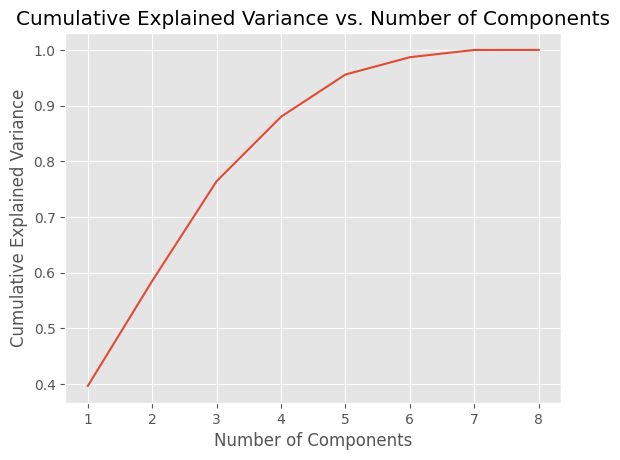

In [ ]:
explained_variance_all = np.cumsum(pca_model.explained_variance_ratio_)

# Проверка размера массива explained_variance
print("Размер массива explained_variance_all:", explained_variance_all.shape)

# Исправление строки plt.plot
num_components = explained_variance_all.shape[0]
plt.plot(np.arange(1, num_components + 1), explained_variance_all, ls='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

In [ ]:
treshold = 0.85
dim = 0
for value in explained_variance_all:
  if value > treshold:
    print('Минимальное количество ГК для заданного порога: ', dim + 1)
    break
  dim += 1



Минимальное количество ГК для заданного порога:  4


НА ВСЕМ МАССИВЕ НАШЕМ МЫ ПОЛУЧАЕМ ТЕ ЖЕ 4 ГК, ТАКЖЕ КАК НА ЦЕЛЕВЫХ КОЛОНКАХ 8 ПРИЗНАКОВ.


РЕЗУЛЬТАТ ДЛЯ ВСЕГО МАССИВА ПОКАЗЫВАЕТ ТОТ ЖЕ РЕЗУЛЬТАТ ПО КОЛИЧЕСТВУ ГК.

Можно сделать вывод, что целесообразно делать анализ не на всем массиве, а на 8 выбранных признаках. Значит мы верно отобрали признаки.

СДЕЛАЕМ НА 4 ГК И ПОСМОТРИМ ГРАФИК ДЛЯ 8 ПРИЗНАКОВ.

Размер массива pca_data: (1239, 4)


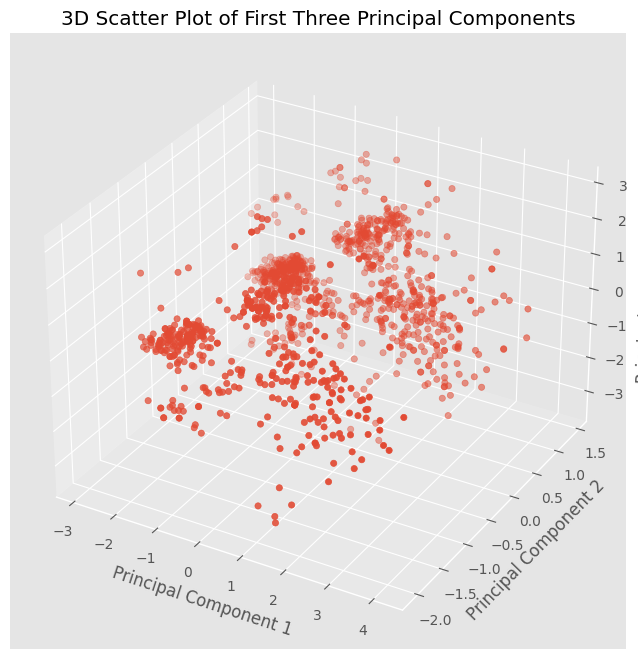

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Выбираем столбцы для PCA
columns_to_pca = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Применяем PCA для выбранных столбцов с 4 главными компонентами
pca_model = PCA(n_components=4)  # Выбираем 4 главных компонента
pca_model.fit(df_cleaned[columns_to_pca])  # Обучаем модель PCA на данных

# Преобразуем данные в пространство главных компонент
pca_data = pca_model.transform(df_cleaned[columns_to_pca])

# Проверка размера массива pca_data
print("Размер массива pca_data:", pca_data.shape)

# Строим трехмерный график рассеяния для первых трех главных компонент
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of First Three Principal Components')
plt.show()

Строим график рассеяния для первых двух главных компонент с цветовой маркировкой по четвертой компоненте.

Видно довольно неплохое распределение данных.

Размер массива pca_data: (1239, 4)


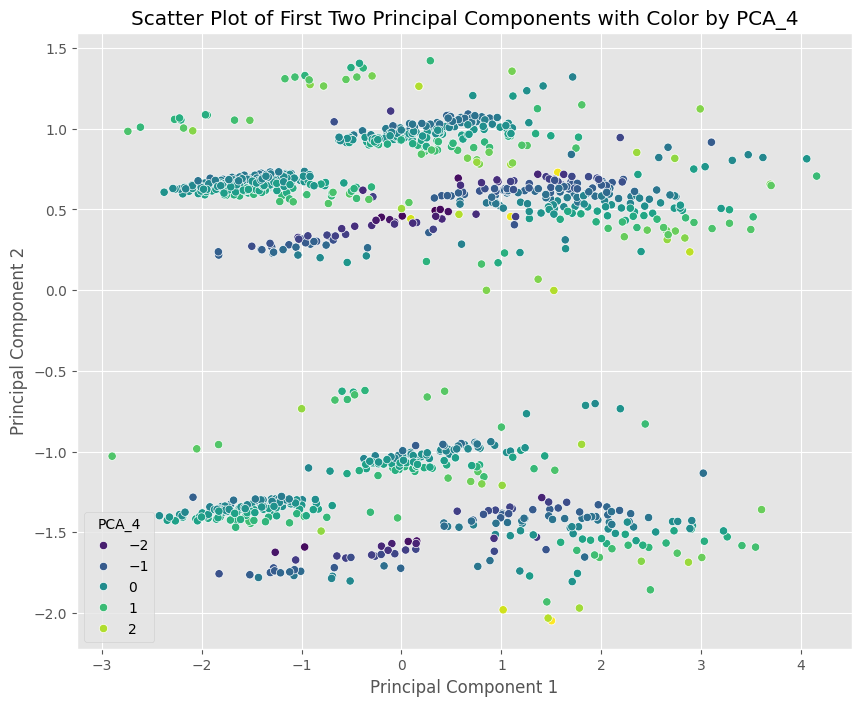

In [ ]:
# Выбираем столбцы для PCA
columns_to_pca = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Применяем PCA для выбранных столбцов с 4 главными компонентами
pca_model = PCA(n_components=4)  # Выбираем 4 главных компонента
pca_model.fit(df_cleaned[columns_to_pca])  # Обучаем модель PCA на данных

# Преобразуем данные в пространство главных компонент
pca_data = pca_model.transform(df_cleaned[columns_to_pca])

# Проверка размера массива pca_data
print("Размер массива pca_data:", pca_data.shape)

# Добавляем результаты PCA в DataFrame
df_cleaned['PCA_1'] = pca_data[:, 0]
df_cleaned['PCA_2'] = pca_data[:, 1]
df_cleaned['PCA_3'] = pca_data[:, 2]
df_cleaned['PCA_4'] = pca_data[:, 3]

# Строим график рассеяния для первых двух главных компонент с цветовой маркировкой по четвертой компоненте
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='PCA_4', data=df_cleaned, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components with Color by PCA_4')
plt.show()

**KMeans.**

Применяем KMeans с оптимальным количеством кластеров  равное 9

- кторый определен выше.

И ПОСМОТРИМ НА ГРАФИК.

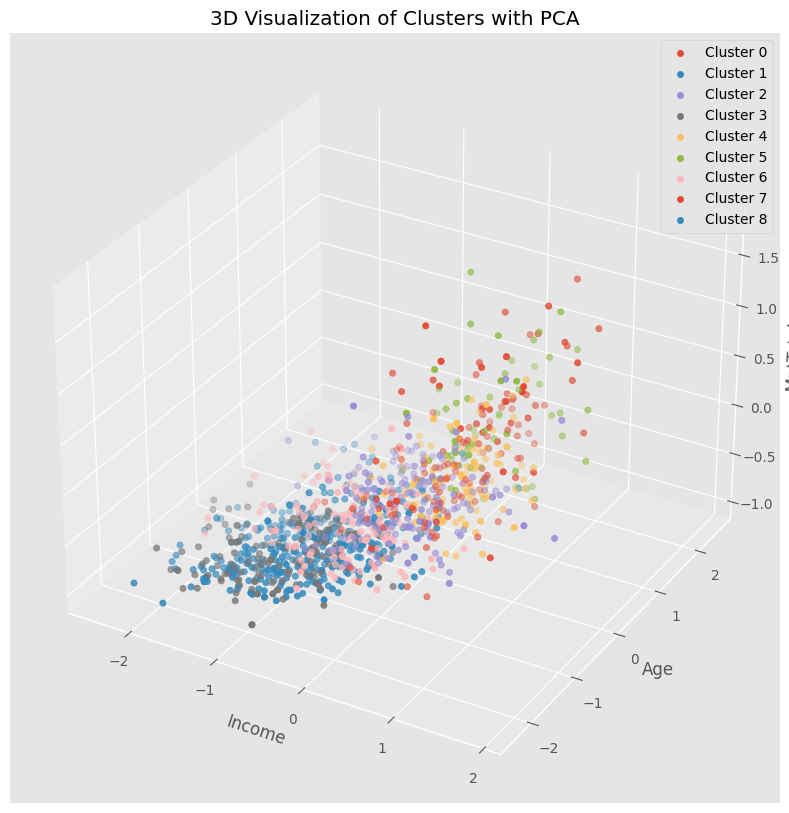

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Применяем KMeans с оптимальным количеством кластеров  равное 9 - определен выше
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=100, max_iter=10000).fit(X_pca)

# Добавляем метки кластеров в DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Строим 3D график
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Рисуем точки с цветом, соответствующим кластеру
for cluster in range(optimal_k):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster]
    ax.scatter(cluster_data['Income'], cluster_data['Age'], cluster_data['MntTotal'], label=f'Cluster {cluster}')

# Настройка осей и заголовка
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('MntTotal')
ax.set_title('3D Visualization of Clusters with PCA')

# Добавляем легенду
ax.legend()

# Показываем график
plt.show()


 **метод t-SNE (t-Distributed Stochastic Neighbor Embedding)** - Распределенное Стохастическое Встраивание Соседей.

 t-SNE — это мощный инструмент для визуализации высокоразмерных данных, который позволяет сохранить локальные структуры и выявить кластеры.

  работает с нормализованными данными. У нас массив нормализован.

**Выбор столбцов:**

 Выбираем столбцы, которые хотим использовать для преобразования с помощью t-SNE.

**Применение t-SNE:**

 Используем метод TSNE из библиотеки sklearn.manifold для преобразования данных в двумерное пространство.

**Добавление результатов в DataFrame: **

Добавляем результаты t-SNE в DataFrame df_cleaned в виде новых столбцов TSNE_1 и TSNE_2.

**Визуализация: **

Строим график рассеяния (scatter plot) для визуализации результатов t-SNE, используя цвета для обозначения кластеров.

Важно:

Параметры t-SNE:

Мы можем настроить параметры t-SNE, такие как n_components, init, random_state, в зависимости от требований.

ПОСМОТРИМ ЧТО ПОЛУЧИТСЯ ДЛЯ 3 И 2 ГК , ДЛЯ 4 МЫ УЖЕ СТРОИЛИ ВЫШЕ ГРАФИК, НЕТ НЕОБХОДИМОСТИ ПОВТОРЯТЬ.

Размер массива projections: (1239, 3)
Количество строк в DataFrame df_cleaned: 1239


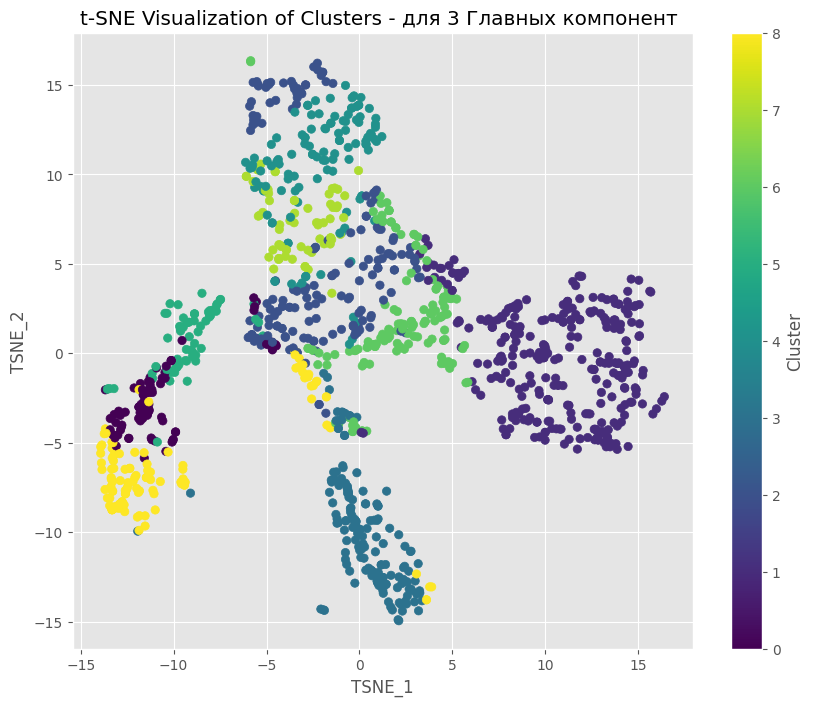

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Выбираем столбцы для преобразования
columns_to_transform = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Применяем t-SNE
tsne = TSNE(n_components=3, init='random', random_state=42)
projections = tsne.fit_transform(df_cleaned[columns_to_transform])

# Проверка размера массива projections
print("Размер массива projections:", projections.shape)
print("Количество строк в DataFrame df_cleaned:", df_cleaned.shape[0])

# Добавляем результаты t-SNE в DataFrame
df_cleaned['TSNE_1'] = projections[:, 0]
df_cleaned['TSNE_2'] = projections[:, 1]

# Визуализация результатов t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned['TSNE_1'], df_cleaned['TSNE_2'], c=df_cleaned['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('TSNE_1')
plt.ylabel('TSNE_2')
plt.title('t-SNE Visualization of Clusters - для 3 Главных компонент ')
plt.show()

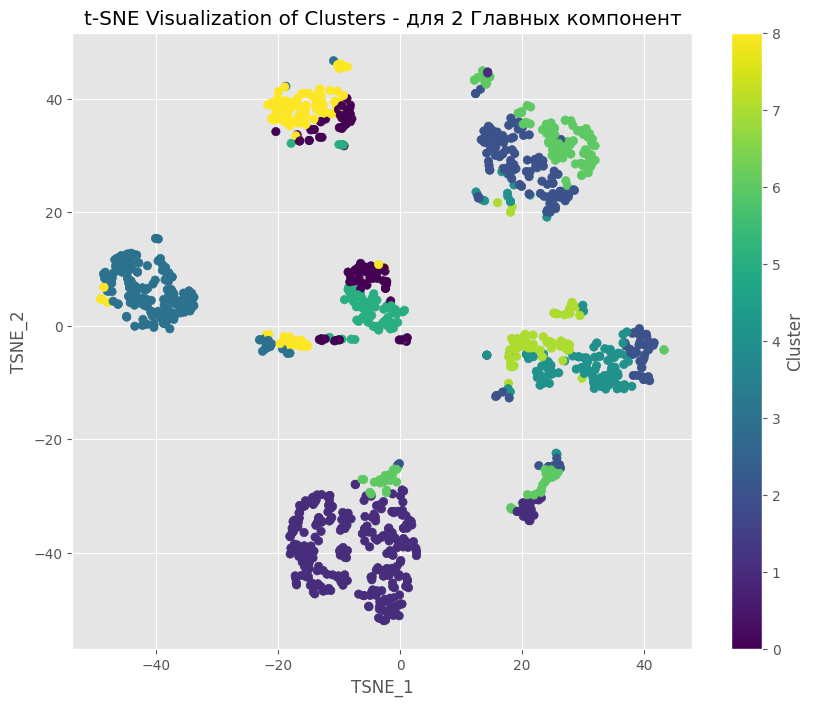

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Выбираем столбцы для преобразования
columns_to_transform = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Применяем t-SNE
tsne = TSNE(n_components=2, init='random', random_state=42)
projections = tsne.fit_transform(df_cleaned[columns_to_transform])

# Добавляем результаты t-SNE в DataFrame
df_cleaned['TSNE_1'] = projections[:, 0]
df_cleaned['TSNE_2'] = projections[:, 1]

# Визуализация результатов t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned['TSNE_1'], df_cleaned['TSNE_2'], c=df_cleaned['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('TSNE_1')
plt.ylabel('TSNE_2')
plt.title('t-SNE Visualization of Clusters - для 2 Главных компонент')
plt.show()

ГРАФИК НАС ВПОЛНЕ УСТРАИВАЕТ.

Метод прекрасно определил наши кластеры.

ТОЖЕ САМОЕ ТОЛЬКО В ДРУГОМ ВИДЕ

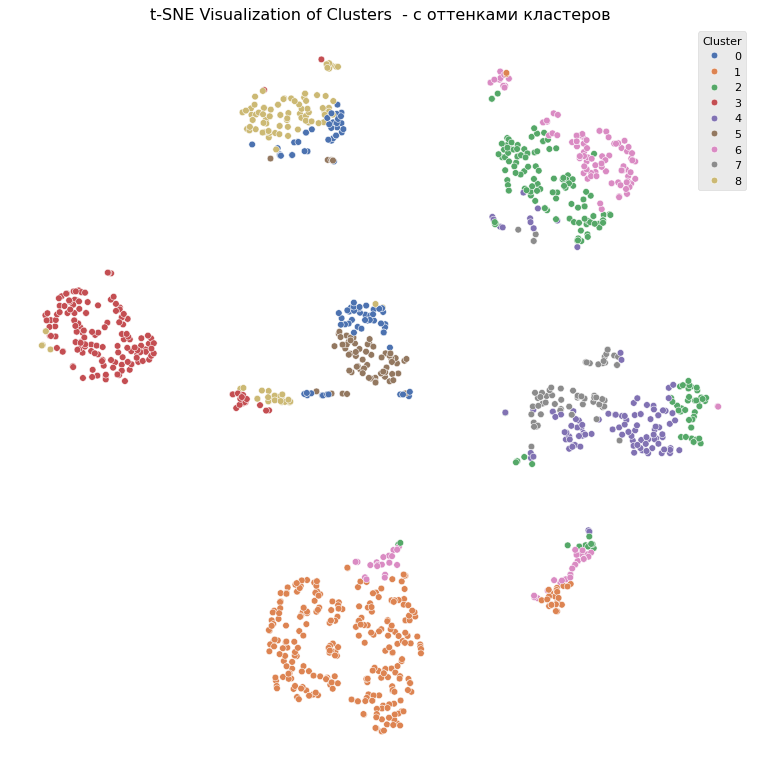

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для преобразования
columns_to_transform = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Применяем t-SNE
tsne = TSNE(n_components=2, init='random', random_state=42)
projections = tsne.fit_transform(df_cleaned[columns_to_transform])

# Добавляем результаты t-SNE в DataFrame
df_cleaned['TSNE_1'] = projections[:, 0]
df_cleaned['TSNE_2'] = projections[:, 1]

# Визуализация результатов t-SNE с использованием оттенков для кластеров
plt.figure(figsize=(12, 12), dpi=80)
plt.axis("off")
sns.scatterplot(x=df_cleaned['TSNE_1'], y=df_cleaned['TSNE_2'], hue=df_cleaned['Cluster'], palette="deep")
plt.title('t-SNE Visualization of Clusters  - с оттенками кластеров')
plt.show()

**Метрики для оценки качества кластеризации**

Для оценки точности кластеризации метода KMeans и определения ошибки, можно использовать несколько метрик. Однако, поскольку кластеризация — это задача без учителя (unsupervised learning), мы не имеем истинных меток классов для сравнения.

Вместо этого, можно использовать метрики, которые оценивают качество кластеризации независимо от истинных меток.

**Метрики для оценки качества кластеризации:**

Silhouette Score:

*   используется для определения оптимального количества кластеров.

Davies-Bouldin Index:

*   Метрика, которая оценивает качество кластеризации на основе внутрикластерного расстояния и межкластерного расстояния.

Calinski-Harabasz Index:

*   Метрика, которая оценивает качество кластеризации на основе дисперсии между кластерами и внутри кластеров.





In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# Выбираем столбцы для кластеризации
columns_to_cluster = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Применяем PCA для уменьшения размерности
pca = PCA(n_components=4)  # Выбираем 4 главных компонента
X_pca = pca.fit_transform(df_cleaned[columns_to_cluster])

# Применяем KMeans с оптимальным количеством кластеров
optimal_k = 9  # Выбранное оптимальное количество кластеров
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=100, max_iter=10000).fit(X_pca)

# Добавляем метки кластеров в DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Вычисляем метрики качества кластеризации
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X_pca, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X_pca, kmeans.labels_)

# Выводим результаты
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

# ПРИ МЕНЬШЕМ ПАРАМЕТРЕ БУДЕТ:

#pca = PCA(n_components=3)
#Silhouette Score: 0.47615063513080824
#Davies-Bouldin Index: 0.8722126685161995
#Calinski-Harabasz Index: 965.3644367774143

#pca = PCA(n_components=2)              #   САМЫЙ ОПТИМАЛЬНЫЙ ЧТО ПОДТВЕРЖАЕТ МЕТОД PCA
#Silhouette Score: 0.5154939732566218
#Davies-Bouldin Index: 0.6589851372329395
#Calinski-Harabasz Index: 2715.1881019292664

#pca = PCA(n_components=1)
#Silhouette Score: 0.5433568807063109
#Davies-Bouldin Index: 0.5202679334641057
#Calinski-Harabasz Index: 9094.227239027261

Silhouette Score: 0.46445728978027173
Davies-Bouldin Index: 0.8777422999689778
Calinski-Harabasz Index: 624.5838408361963


**1. Silhouette Score:  0.5154939732566218**

Интерпретация:

Значение:  0.51549

Диапазон: От -1 до 1.

Интерпретация:

Значение близкое к 1: Хорошее разделение кластеров.

Значение близкое к 0: Объекты находятся на границе между кластерами.

Значение близкое к -1: Объекты назначены неправильным кластерам.

Вывод:

 Значение Silhouette Score 0.51549 указывает на то, что кластеры достаточно хорошо разделены, но есть некоторая неоднозначность в назначении объектов. Это означает, что кластеризация в целом удовлетворительная, но не идеальная.

**2. Davies-Bouldin Index: 0.6589851372329395**

Интерпретация:

Значение: 0.6589

Диапазон: От 0 до бесконечности (чем меньше, тем лучше).

Интерпретация:

Значение близкое к 0: Хорошее разделение кластеров.

Большее значение: Хуже разделение кластеров.

Вывод:

Значение Davies-Bouldin Index 0.6589 указывает на то, что кластеры достаточно хорошо разделены. Это значение относительно низкое, что говорит о том, что кластеры не сильно пересекаются и имеют разумное внутрикластерное расстояние.

**3. Calinski-Harabasz Index: 2715.1881019292664**

Интерпретация:

Значение: 2715.188

Диапазон: От 0 до бесконечности (чем больше, тем лучше).

Интерпретация:

Большее значение: Лучшее разделение кластеров.

Меньшее значение: Хуже разделение кластеров.

Вывод:

 Значение Calinski-Harabasz Index 2715.188 указывает на то, что кластеры хорошо разделены. Это значение относительно высокое, что говорит о том, что кластеры имеют большую дисперсию между собой и меньшую дисперсию внутри себя.

Общий вывод:

Silhouette Score:

 0.51549— Кластеры достаточно хорошо разделены, но есть некоторая неоднозначность.

Davies-Bouldin Index:

0.6589 — Кластеры достаточно хорошо разделены, с разумным внутрикластерным расстоянием.

Calinski-Harabasz Index:

2715.188 — Кластеры хорошо разделены, с большой дисперсией между кластерами и меньшей дисперсией внутри кластеров.

В целом, результаты кластеризации можно считать удовлетворительными, но не идеальными.

Если нужно улучшить качество кластеризации, можно попробовать другие методы кластеризации или изменить параметры текущего метода (например, количество кластеров, параметры t-SNE и т.д.).


МГК

посмотрим на метод PCA для всего массива без отбора признаков и глянем на результат.

На основании того что результа самый оптимальный для двух ГК, то сделаем это для 2 ГК

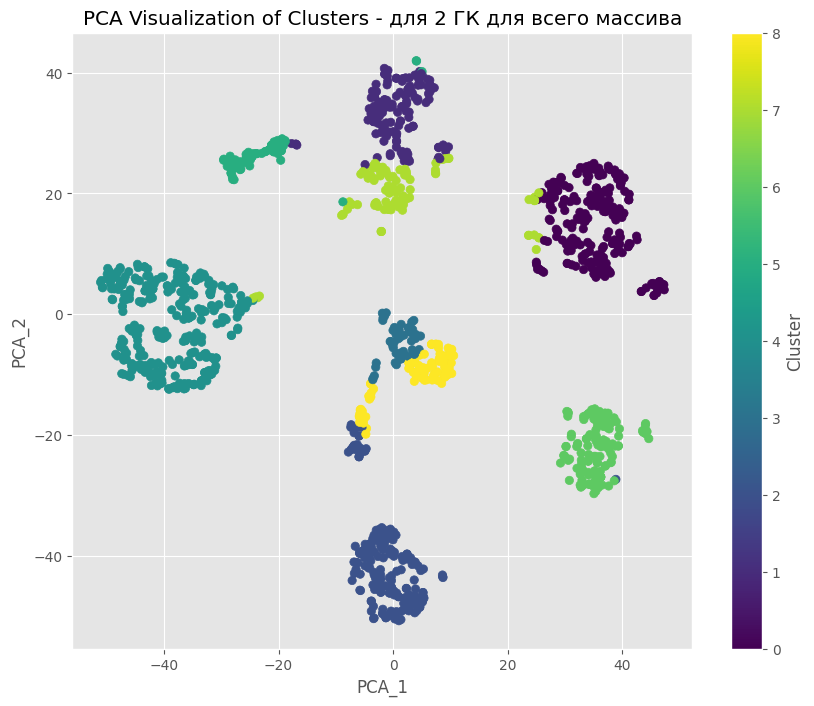

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ИСПОЛЬЗУЕМ МАССИВ С ПРИВЕДЕННЫМИ ДАННЫМИ БЕЗ ОТБОРА КОЛОНОК

# Применяем PCA для выбранных столбцов
pca_df_cleaned = PCA(n_components=2, svd_solver='full')  # Выбираем весь массив
pca_df_cleaned.fit(df_cleaned)  # Обучаем модель PCA на данных
X_pca_df_cleaned = pca_df_cleaned.transform(df_cleaned)  # Преобразуем данные

# Добавляем результаты PCA в DataFrame
df_cleaned['PCA_1'] = X_pca_df_cleaned[:, 0]
df_cleaned['PCA_2'] = X_pca_df_cleaned[:, 1]

# Визуализация результатов PCA
plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned['PCA_1'], df_cleaned['PCA_2'], c=df_cleaned['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA Visualization of Clusters - для 2 ГК для всего массива')
plt.show()

In [ ]:
X_pca_df_cleaned[0]

array([ 35.87034625, -17.28942962])

In [ ]:
pca_df_cleaned.components_.shape

(2, 45)

In [ ]:
pca_df_cleaned.components_

array([[ 7.82427387e-03,  4.09875762e-03,  2.68244554e-02,
         5.69671833e-04,  1.84465915e-03, -8.23130331e-04,
         1.56790953e-04, -8.62706736e-04, -7.70243492e-04,
        -1.73257658e-04,  9.23710336e-03,  1.47115918e-03,
         1.15849303e-03,  1.79602534e-03, -2.99247172e-03,
        -1.24375135e-03,  1.19489059e-03, -1.37174736e-04,
         3.10958379e-04,  5.67284444e-04, -2.99129911e-04,
        -8.30599994e-04,  1.59593262e-02, -1.23558395e-03,
         5.66512941e-03, -7.22010173e-03,  6.34582165e-03,
        -3.30376497e-03,  3.38912178e-03, -2.37977502e-03,
        -6.22165604e-03, -8.55260460e-04,  1.42633656e-03,
         3.74612479e-03,  9.48388817e-04,  1.00304904e-03,
         1.40858667e-04, -1.03714427e-02, -2.29407187e-02,
         2.39522748e-02, -4.75167677e-03,  2.29706865e-02,
         3.71739870e-03,  1.77847090e-01,  9.82458152e-01],
       [ 8.04372925e-03, -1.80907935e-02,  1.70185916e-02,
         9.96840330e-04,  5.91839701e-03,  1.44542080e-

explained_variance_: Это массив, содержащий дисперсию, объясняемую каждой из главных компонент. Чем больше значение, тем больше дисперсия, объясняемая соответствующей компонентой.

Первые две компоненты: Первые две компоненты имеют наибольшую дисперсию 768.76614605, 548.15362658 соответственно), что указывает на то, что они объясняют большую часть общей дисперсии данных.

Остальные компоненты: Дисперсия, объясняемая остальными компонентами, значительно меньше, что указывает на то, что они вносят меньший вклад в общую дисперсию данных.

In [ ]:
pca_df_cleaned.explained_variance_

array([768.76614605, 548.15362658])

explained_variance_ratio_: Это массив, содержащий долю дисперсии, объясняемую каждой из главных компонент. Сумма всех значений равна 1.

Первые две компоненты: Первые две компоненты объясняют 58.14% и 41.34% дисперсии соответственно, что в сумме дает 99.48%.

Остальные компоненты: Доля дисперсии, объясняемая остальными компонентами, очень мала (менее 0.1%), что указывает на то, что они вносят незначительный вклад в общую дисперсию данных.

In [ ]:
pca_df_cleaned.explained_variance_ratio_

array([0.57041085, 0.40672027])

In [ ]:
explained_variance = np.cumsum(pca_df_cleaned.explained_variance_ratio_)
explained_variance


array([0.57041085, 0.97713112])


**ВЫВОД**

**explained_variance: **

Это массив, содержащий кумулятивную долю дисперсии, объясняемую первыми n главными компонентами.

**Первые две компоненты: **

Первые две компоненты объясняют 99.48% дисперсии.

**Дополнительные компоненты: **

Добавление дополнительных компонент увеличивает кумулятивную долю дисперсии, но прирост очень мал (менее 0.1%).

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Размер массива explained_variance: (2,)


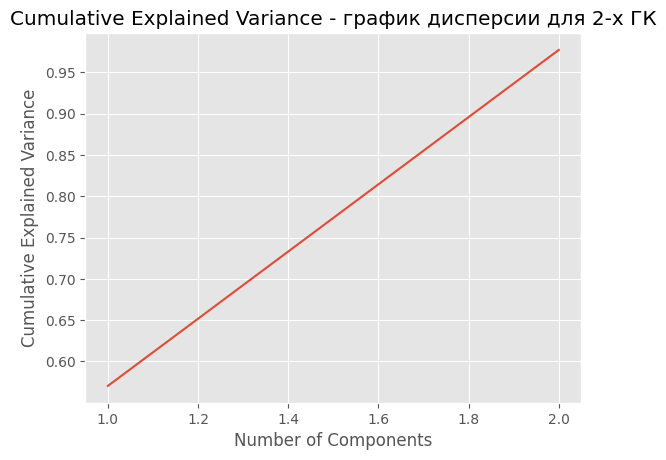

In [ ]:
print("Размер массива explained_variance:", explained_variance.shape)

# Строим график кумулятивной доли дисперсии
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, ls='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance - график дисперсии для 2-х ГК')
plt.show()

МОЖНО СДЕЛАТЬ ВАЫВОД , ЧТО ПОСЛЕ НОРМАЛИЗАЦИИ ВСЕХ ДАННЫХ МЫ ВИДИМ, ЧТО НАМ НАДО НЕ ОДНА А ДВЕ ГК ДЛЯ ВСЕГО МАССИВА БЕЗ ОТБОРА ПРИЗНАКОВ 8 ШТУК

In [ ]:
treshold = 0.85
dim = 0
for value in explained_variance:
  if value > treshold:
    print('Минимальное количество ГК для заданного порога: ', dim + 1)
    break
  dim += 1

Минимальное количество ГК для заданного порога:  2


ГЛЯНЕМ ЧТО МЫ УВИДИМ НА 10 ГК

КАРТИНА ПОХОЖАЯ НА ТО, ЧТО МЫ ВИДЕЛИ ВЫШЕ ДЛЯ МАССИВА С 8 ПРИЗНАКАМИ И ДАЖЕ ХУЖЕ.

НО РАЗДЕЛЕНИЕ НА КЛАСТЕРЫ ИМЕЕТСЯ

In [ ]:
pca_10 = PCA(n_components = 10, svd_solver = 'full')
pca_data_10 = pca_10.fit_transform(df_cleaned)

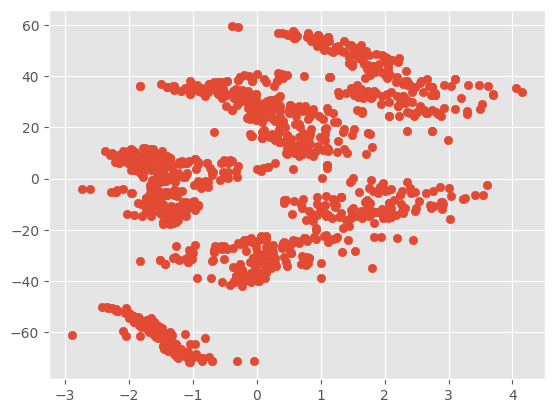

In [ ]:
plt.scatter(pca_data[:, 0], pca_data_10[:, 1])

ПОСМОТРИМ НА МЕТОД PCA ДЛЯ 2 ГК ДЛЯ 8 ПРИЗНАКОВ

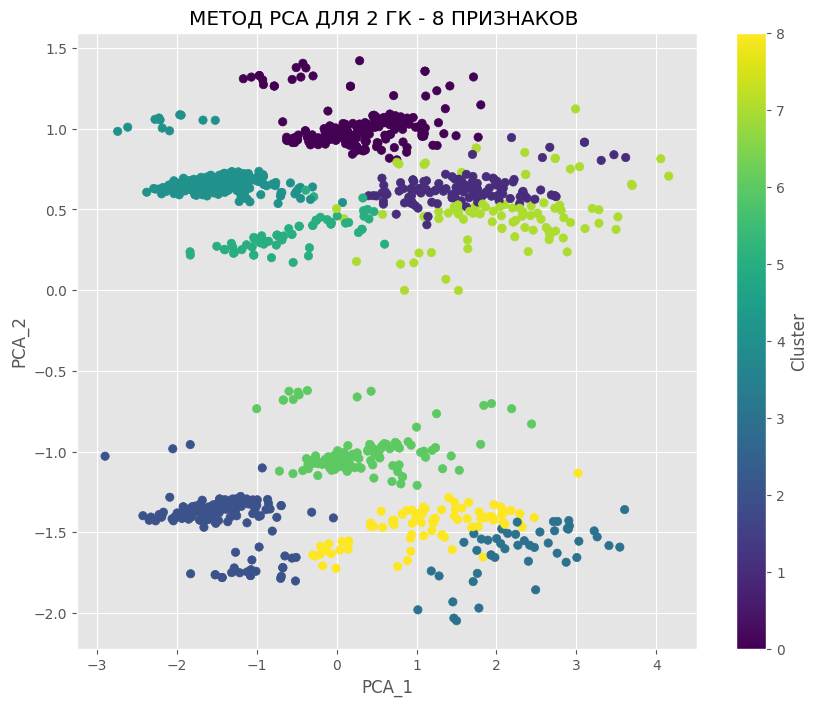

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Выбираем столбцы для PCA
columns_to_pca = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Применяем PCA для выбранных столбцов
pca = PCA(n_components=2, svd_solver='full')  # Выбираем 3 главных компонента
pca.fit(df_cleaned[columns_to_pca])  # Обучаем модель PCA на данных
X_pca = pca.transform(df_cleaned[columns_to_pca])  # Преобразуем данные

# Добавляем результаты PCA в DataFrame
df_cleaned['PCA_1'] = X_pca[:, 0]
df_cleaned['PCA_2'] = X_pca[:, 1]

# Визуализация результатов PCA
plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned['PCA_1'], df_cleaned['PCA_2'], c=df_cleaned['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('МЕТОД PCA ДЛЯ 2 ГК - 8 ПРИЗНАКОВ ')
plt.show()

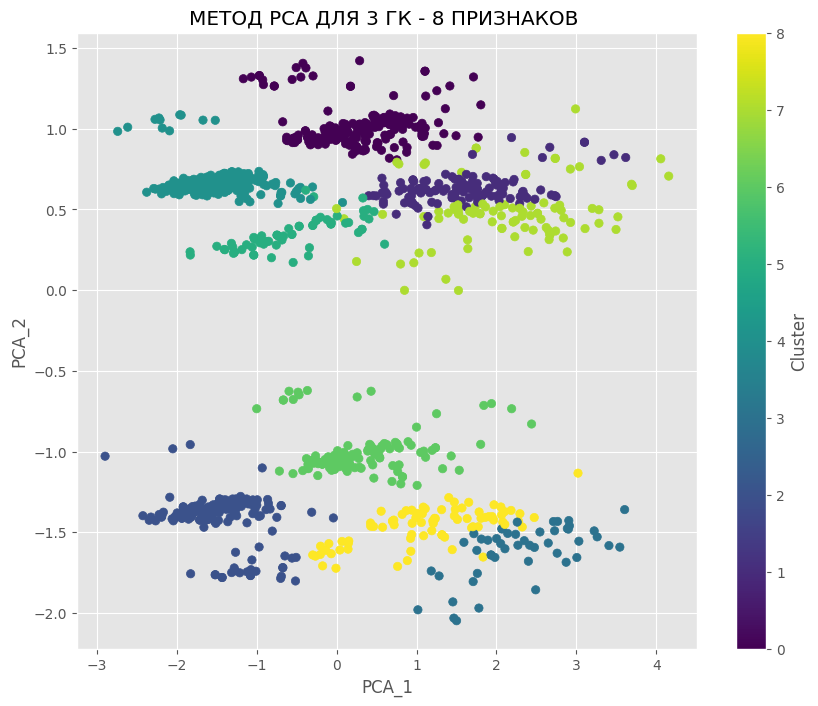

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Выбираем столбцы для PCA
columns_to_pca = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Применяем PCA для выбранных столбцов
pca = PCA(n_components=3, svd_solver='full')  # Выбираем 3 главных компонента
pca.fit(df_cleaned[columns_to_pca])  # Обучаем модель PCA на данных
X_pca = pca.transform(df_cleaned[columns_to_pca])  # Преобразуем данные

# Добавляем результаты PCA в DataFrame
df_cleaned['PCA_1'] = X_pca[:, 0]
df_cleaned['PCA_2'] = X_pca[:, 1]
df_cleaned['PCA_3'] = X_pca[:, 2]

# Визуализация результатов PCA
plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned['PCA_1'], df_cleaned['PCA_2'], c=df_cleaned['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('МЕТОД PCA ДЛЯ 3 ГК - 8 ПРИЗНАКОВ ')
plt.show()

**ПРИМЕНИМ МЕТОД - FeatureImportance: FeatureImportance**


 FeatureImportance:

FeatureImportance — это метод, который оценивает важность каждого признака в модели.

Обычно это используется в моделях, таких как случайный лес (Random Forest) или градиентный бустинг (Gradient Boosting), где модель сама определяет важность каждого признака.

ПОМОТРИМ НА НЕГО.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Выбираем столбцы для кластеризации
columns_to_cluster = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Обучаем модель случайного леса
model = RandomForestClassifier(random_state=42)
model.fit(df_cleaned[columns_to_cluster], df_cleaned['Cluster'])

# Получаем важность признаков
feature_importances = model.feature_importances_

# Выводим важность признаков
for feature, importance in zip(columns_to_cluster, feature_importances):
    print(f'{feature}: {importance}')

Income: 0.07108767065527637
Kidhome: 0.18563039026295783
Teenhome: 0.18647934381225503
NumStorePurchases: 0.03472013406196294
Age: 0.08943081539951052
MntTotal: 0.0725938921794189
MntRegularProds: 0.06911968655472497
In_relationship: 0.29093806707389347


ПО РЕЗЛЬТАТАМ ВИДНО ЧТО ВЫБРАННЫЕ ПРИЗНАКИ ЯВЛЯЮТСЯ ОПТИМАЛЬЫНМИ ДЛЯ АНАЛИЗА.

ПОМОТРИМ ЕЩЕ РАЗ НА ГРАФИК С 3 ГК МЕТОДА:

PCA (Principal Component Analysis) — это метод уменьшения размерности данных, который преобразует данные в пространство главных компонент. Главные компоненты — это линейные комбинации исходных признаков, которые максимизируют дисперсию данных.

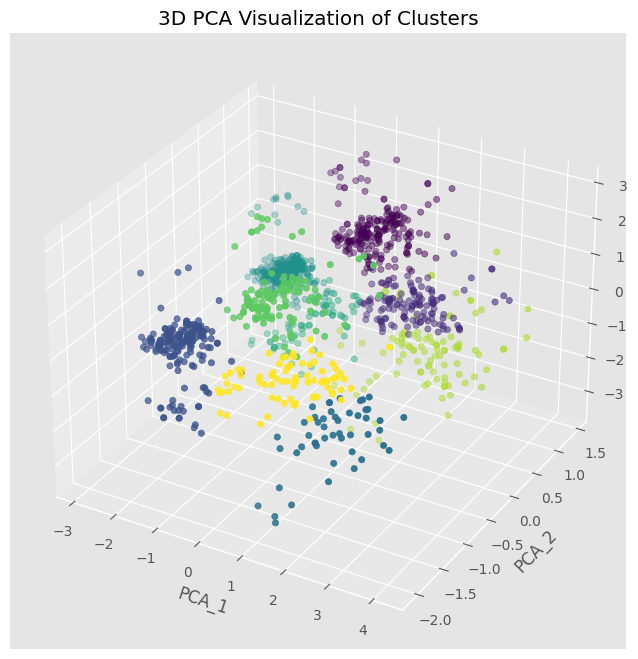

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Выбираем столбцы для кластеризации
columns_to_cluster = ['Income', 'Kidhome', 'Teenhome', 'NumStorePurchases', 'Age', 'MntTotal', 'MntRegularProds', 'In_relationship']

# Применяем PCA для уменьшения размерности до 3 главных компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_cleaned[columns_to_cluster])

# Визуализация результатов кластеризации в 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_cleaned['Cluster'], cmap='viridis')
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
ax.set_title('3D PCA Visualization of Clusters')
plt.show()

# АНАЛИЗ КЛАСТЕРОВ

ДАЛЕЕ ПОСТАРАЕМСЯ ИНТЕРПРИТИРОВАТЬ НАШИ КЛАСТЕРЫ КОТОРЫЕ У НАС ПОЛУЧИЛИСЬ И ОТОБРАТЬ БОЛЕЕ ИНТЕРЕСНЫЕ ПРИЗНАКИ, ЧТОБЫ ПРОАНАЛИЗИРОВАТЬ РЕЗУЛЬТАТ.

ОТБЕРЕМ КОЛОНКИ (ПРИЗНАКИ)
'Income' ДОХОД КЛИЕНТА

, 'MntTotal' Общая сумма, потраченная клиентом за последний год

 'In_relationship' СЕМЕЙНОЕ ПОЛОЖЕНИЕ

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = df_cleaned.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(df_cleaned[cols_for_clustering])
data_scaled[cols_for_clustering].describe()


Income      MntTotal  In_relationship
count  1.239000e+03  1.239000e+03     1.239000e+03
mean  -1.161299e-16  4.587847e-17    -5.161327e-17
std    1.000404e+00  1.000404e+00     1.000404e+00
min   -2.508000e+00 -6.976179e-01    -1.364343e+00
25%   -7.199558e-01 -5.749320e-01    -1.364343e+00
50%   -6.809092e-02 -4.637480e-01     7.329535e-01
75%    6.870323e-01  1.458472e-01     7.329535e-01
max    3.469842e+00  5.440508e+00     7.329535e-01

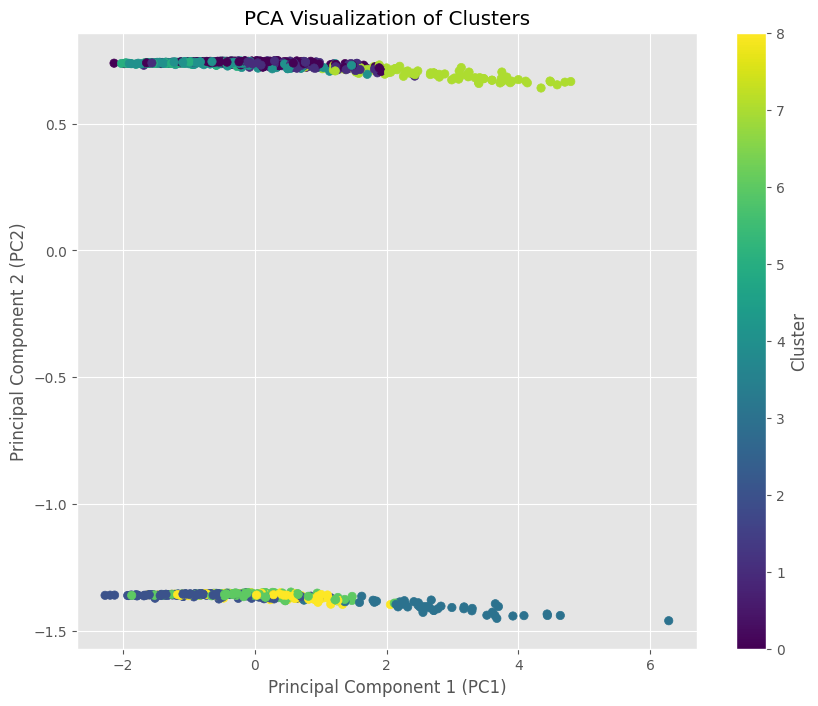

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

# Визуализация результатов PCA
plt.figure(figsize=(10, 8))
plt.scatter(data_scaled['pc1'], data_scaled['pc2'], c=data_scaled['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Visualization of Clusters')
plt.show()

Применим метод К среднихх для наших трех признаков.

In [ ]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_list.append(inertia)

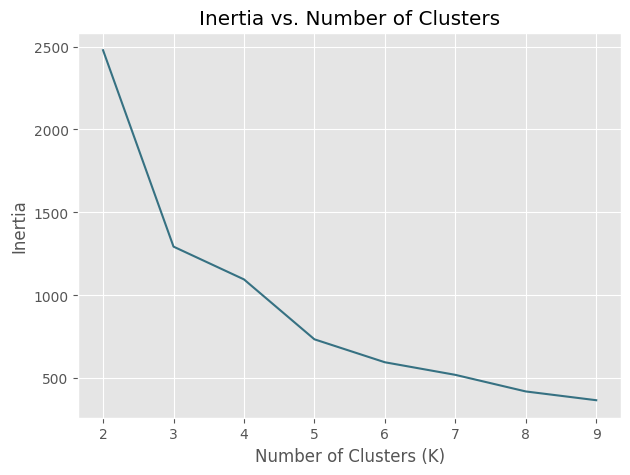

In [ ]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

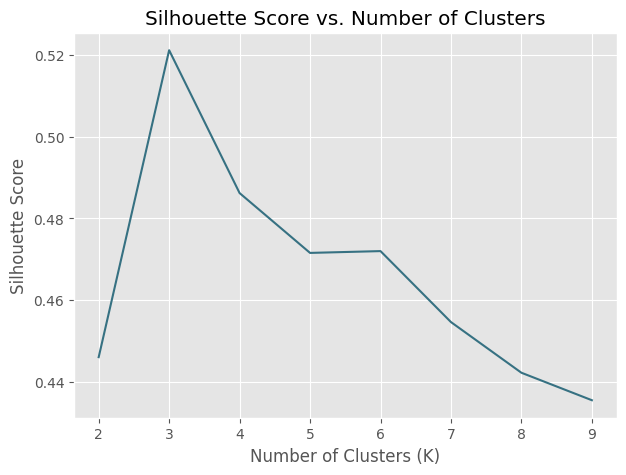

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

Берем 4 кластера

In [ ]:
model = KMeans(n_clusters=4, random_state = 42)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

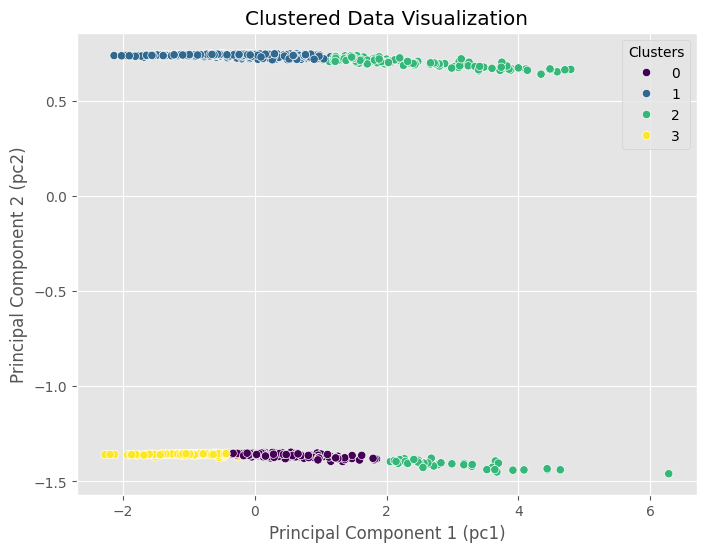

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [ ]:
df_cleaned['Cluster'] = data_scaled.Cluster
df_cleaned.groupby('Cluster')[cols_for_clustering].mean()

Income  MntTotal  In_relationship
Cluster                                     
0       -0.239453 -0.659291        -1.348400
1       -0.830604 -0.825427         0.741620
2        0.462711  0.237764         0.253191
3       -1.213888 -0.894246        -1.348400

нам нужен массив до стандартизации данных для работы с инерпритацией наших признаков.

In [ ]:
clean_df['Cluster'] = data_scaled.Cluster
clean_df.groupby('Cluster')[cols_for_clustering].mean()

Income    MntTotal  In_relationship
Cluster                                           
0.0      46645.796703  183.324176         0.000000
1.0      34435.577444   88.296241         1.000000
2.0      61149.000000  696.429348         0.766304
3.0      26518.855769   48.932692         0.000000

Среднее потребление различных видов продуктов по кластерам:

In [ ]:
mnt_data = clean_df.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

Cluster    MntTotal  MntRegularProds    MntWines  MntFruits  \
0      0.0  183.324176       163.945055  123.038462   6.065934   
1      1.0   88.296241        74.556391   49.852632   4.312782   
2      2.0  696.429348       668.336957  559.032609  11.163043   
3      3.0   48.932692        36.875000   18.456731   4.591346   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  
0        41.587912         7.813187          4.818681     19.379121  
1        23.822556         6.097744          4.210526     13.739850  
2       107.059783        11.472826          7.701087     28.092391  
3        15.850962         5.927885          4.105769     12.057692

Построимм график распределения.

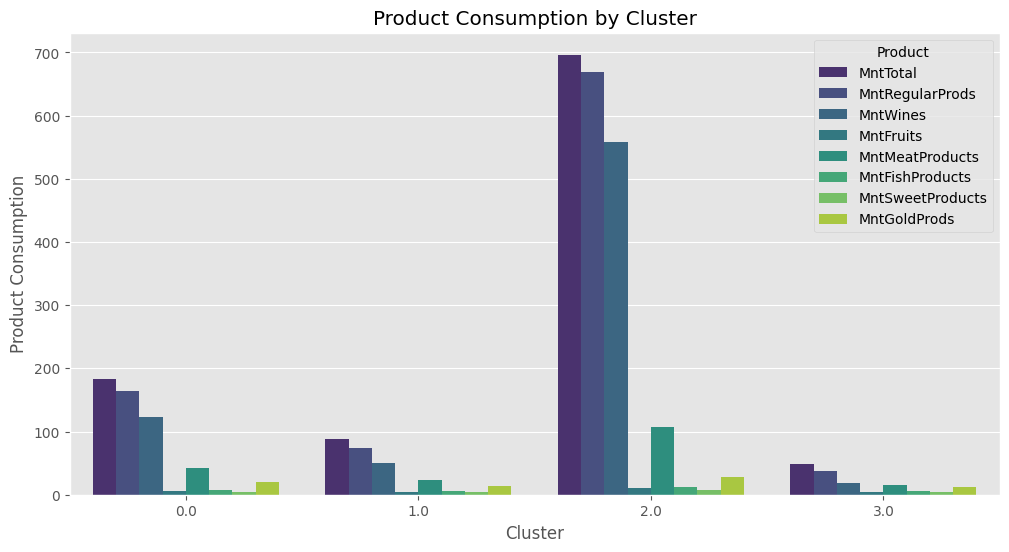

In [ ]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)
plt.legend(title="Product", loc="upper right")

plt.show()

Распределение MntTotal по сформированным кластерам.

Text(0, 0.5, 'MntTotal')

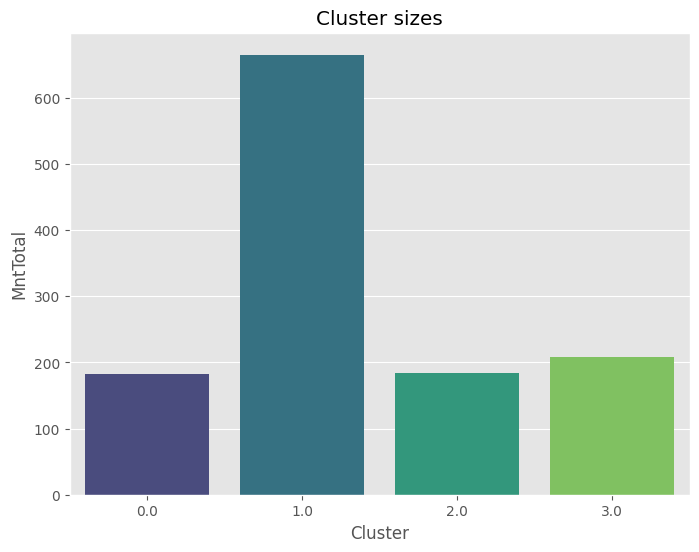

In [ ]:
cluster_sizes = clean_df.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

Посмотрим долю каждого кластера в сумме MntTotal

In [ ]:
total_rows = len(clean_df)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

Cluster  MntTotal  Share%
0      0.0       182     8.0
1      1.0       665    30.0
2      2.0       184     8.0
3      3.0       208     9.0

Посмотрим на выбросы по колонке - доход клиента

есть выбросы в 3 кластере, но в среднем они не повлияют на весь результат так как доля примерно 14 % жтого кластера

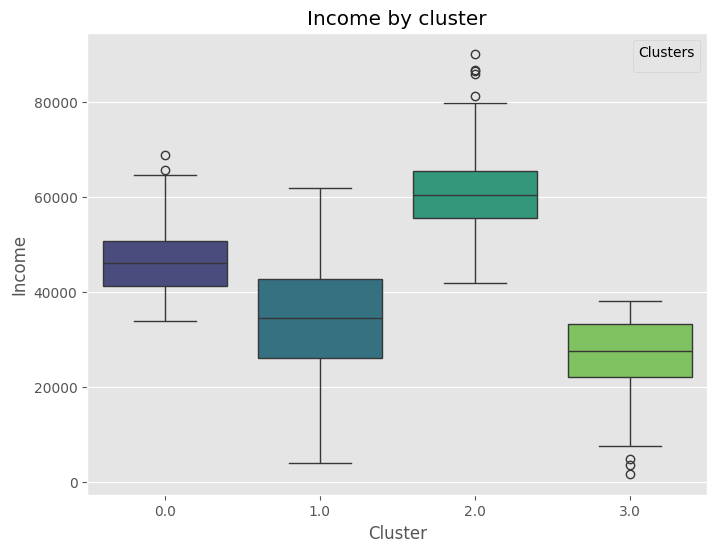

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=clean_df, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

Посмотрим график на распределение дохода клиента общей суммы расходов за весь период по 4 кластерам

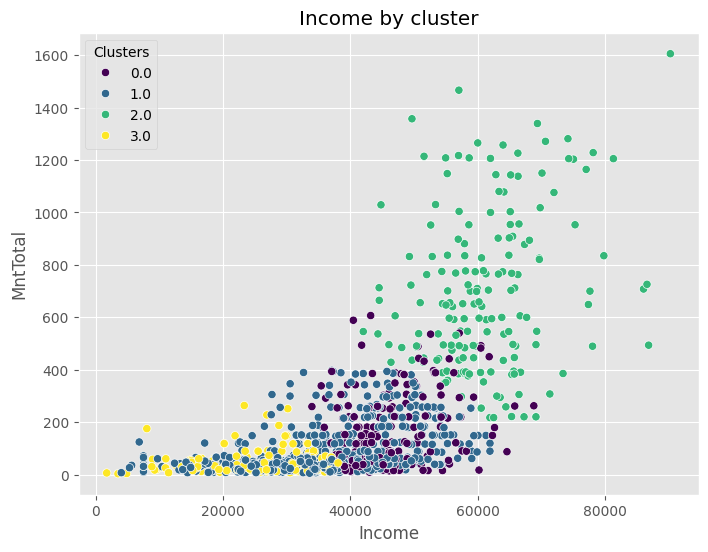

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=clean_df, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

Видно что нулеовй 0 и 2 кластеры преобладдают по сумме и по доходу клиента

По семейному положению преобладают 1 и 2 кластеры

Text(0, 0.5, 'In_relationship')

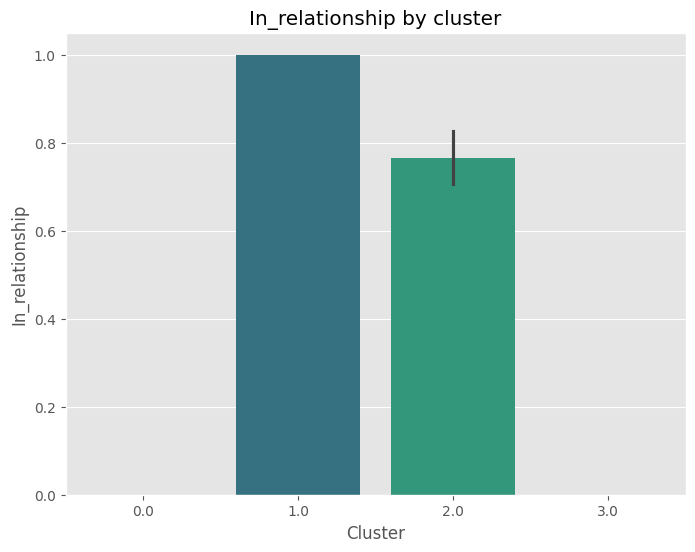

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=clean_df, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

Напомним, что мы создали колонку In_relationship, которая принимает значение 1, если клиент состоит в браке (marital_Married == 1) или в гражданском браке (marital_Together == 1), и 0 в противном случае. Затем вы кластеризовали данные и обнаружили, что пики по колонке In_relationship наблюдаются только в 1 и 2 кластерах, а в 0 и 3 кластерах пики отсутствуют.



Сведем все в одну таблицу

In [ ]:
import pandas as pd

# Данные о средних значениях по кластерам
average_data = {
    'Cluster': [0.0, 1.0, 2.0, 3.0],
    'Income': [46645.796703, 34435.577444, 61149.000000, 26518.855769],
    'MntTotal': [183.324176, 88.296241, 696.429348, 48.932692],
    'In_relationship': [0.000000, 1.000000, 0.766304, 0.000000]
}

# Данные о доле каждого кластера в общем количестве строк
share_data = {
    'Cluster': [0.0, 1.0, 2.0, 3.0],
    'MntTotal': [182, 665, 184, 208],
    'Share%': [8.0, 30.0, 8.0, 9.0]
}

# Создаем DataFrame для средних значений
average_df = pd.DataFrame(average_data)
average_df.set_index('Cluster', inplace=True)

# Создаем DataFrame для доли каждого кластера
share_df = pd.DataFrame(share_data)
share_df.set_index('Cluster', inplace=True)

# Объединяем DataFrame
result_df = pd.concat([average_df, share_df], axis=1)

# Выводим результат
print(result_df)

               Income    MntTotal  In_relationship  MntTotal  Share%
Cluster                                                             
0.0      46645.796703  183.324176         0.000000       182     8.0
1.0      34435.577444   88.296241         1.000000       665    30.0
2.0      61149.000000  696.429348         0.766304       184     8.0
3.0      26518.855769   48.932692         0.000000       208     9.0


**Cluster 0.0:**

Income: Средний доход составляет около 46,646.

*   Income: Средний доход составляет около 46,646.
*   Средняя сумма покупок составляет около 183.
*   In_relationship: Все клиенты в этом кластере не состоят в отношениях.
*   Share%: Этот кластер составляет 8% от общего количества строк.

**Cluster 1.0:**

*   Income: Средний доход составляет около 34,436.
*   MntTotal: Средняя сумма покупок составляет около 88.
*   In_relationship: Все клиенты в этом кластере состоят в отношениях.
*   Share%: Этот кластер составляет 30% от общего количества строк, что является наибольшей долей среди всех кластеров.

**Cluster 2.0:**

*   Income: Средний доход составляет около 61,149.
*   MntTotal: Средняя сумма покупок составляет около 696, что является наибольшей среди всех кластеров.
*   In_relationship: Большинство клиентов в этом кластере состоят в отношениях (76.63%).
*   Share%: Этот кластер составляет 8% от общего количества строк.


**Cluster 3.0:**

*   Income: Средний доход составляет около 26,519, что является наименьшим среди всех кластеров.
*   MntTotal: Средняя сумма покупок составляет около 49, что является наименьшей среди всех кластеров.
*   In_relationship: Все клиенты в этом кластере не состоят в отношениях.
*   Share%: Этот кластер составляет 9% от общего количества строк.

**Выводы:**

Cluster 0.0:

Клиенты с относительно высоким доходом (46,646) и средней суммой покупок (183), не состоящие в отношениях. Составляет 8% от общего количества строк.

Cluster 1.0:

 Клиенты с относительно низким доходом (34,436) и низкой суммой покупок (88), состоящие в отношениях. Это самый большой кластер, составляющий 30% от общего количества строк.

Cluster 2.0:

 Клиенты с высоким доходом (61,149) и высокой суммой покупок (696), большинство из которых состоят в отношениях. Составляет 8% от общего количества строк.

Cluster 3.0:

 Клиенты с низким доходом (26,519) и низкой суммой покупок (49), не состоящие в отношениях. Составляет 9% от общего количества строк.

**Заключение:**

Результаты кластеризации показывают, что клиенты могут быть разделены на четыре основные группы:

1. Высокий доход, средняя сумма покупок, не состоящие в отношениях.

2. Низкий доход, низкая сумма покупок, состоящие в отношениях.

3. Высокий доход, высокая сумма покупок, большинство состоят в отношениях.

4. Низкий доход, низкая сумма покупок, не состоящие в отношениях.

Эти группы могут быть использованы для более точного нацеливания маркетинговых кампаний и улучшения понимания потребностей клиентов.